# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the adult weekend ticket price for ski resorts.

Okay so this is what it comes down to^. We're trying to predict, based off other factors / other resorts, what the weekend price should be. In our case, in Montana, this resort included, weekday and weekend prices are the same, so predicting the weekend price in turn gives us the weekday price to use too by default!

## 3.3 Imports<a id='3.3_Imports'></a>

In [334]:
#The import block below did not fully execute because somehow I didn't have scikitlearn / sklearn installed so it didn't find
#a package by that name
#So I used anaconda's CMD.exe prompt and ran: pip install sklearn
#Looking at the path my packages get installed on, below, we see that it's specific to this 'new' ad-hoc environment
#I created where I had to downgrade my python from 3.8 to 3.7 for better stability. So maybe I had it installed in the other /
#base-root environment but didn't here / doesn't transfer over so had to reinstall

!pip show pandas
!pip show sklearn

Name: pandas
Version: 1.3.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\deens\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn


In [335]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Ski data<a id='3.4.1_Ski_data'></a>

In [336]:
#Note that now our 'ski_data' df variable will be the CLEANED version as we overwrote it at the end of Unit 2
#Remember that I saved my own version of this, but Springboard had its own version preloaded, so we'll go w/ that:
#ski_data = pd.read_csv('../data/ski_data_cleaned.csv')
#hmm okay, so apparently their version of 'ski_data_cleaned.csv' never had any changes?? was just a copy of the original?
#so i actually DO needa use MY version!?:
ski_data = pd.read_csv('../data/ski_data_cleaned_SM.csv')

In [337]:
ski_data[ski_data.AdultWeekend.isnull()]

#ahh, okay. so first of all, 'ski_data', even tho we rewrote / overwrote it from the original in book 2, somehow it seems to
#have reverted to the original variable definition of the ORIGINAL ski_data.csv (not literal real name?)
#and i didn't manually rerun the notebook when i'd reopen it, so later on down towards the end when we rereferenced
#ski_data, it seems like it was referring to the original, UNCLEANED
#>> ACTUALLY NO - somehow, now when i look, thought i checked this before, but - maybe i messed something up,
#but when i look at their ski_data_cleaned.csv now it ISN'T cleaned!?! it seems to be just a copy of the original!
#i assumed they preloaded the cleaned version in there, but maybe the idea was that WE were supposed to keep that name they
#chose and overwrite it w/ our version! i thought it was the former so i made my OWN version in case it differed from theirs!
#fixed above
#so that's one thing
#then next thing, which builds on that, is that RHODE ISLAND was the only one to show w/ as/ NaN because there IS only
#one resort in Rhode Island and that DIDN'T HAVE WEEKEND (or any) PRICE INFO!!! the other states (w/ missings at least)
#all had atleast one other one that DIDN'T have missings, so it just excluded missings from the calculation
#but now we'll re-run the definition above of ski_data which uses the CLEANED and updated version of ski_data, which REMOVED
#ANY resort with missing weekend price info!! so that's the only state that got messed up by the state_avgs since it only
#HAD one to go off of and that was missing in that field!

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [338]:
#nice, ok it's fixed. there IS no adultweekday column and there are no blank weekend prices!
#only 270 values! and only 25 columns!! that's right

In [339]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               270 non-null    object 
 1   Region             270 non-null    object 
 2   state              270 non-null    object 
 3   summit_elev        270 non-null    int64  
 4   vertical_drop      270 non-null    int64  
 5   base_elev          270 non-null    int64  
 6   trams              270 non-null    int64  
 7   fastSixes          270 non-null    int64  
 8   fastQuads          270 non-null    int64  
 9   quad               270 non-null    int64  
 10  triple             270 non-null    int64  
 11  double             270 non-null    int64  
 12  surface            270 non-null    int64  
 13  total_chairs       270 non-null    int64  
 14  Runs               267 non-null    float64
 15  TerrainParks       228 non-null    float64
 16  LongestRun_mi      265 non

So we see that we have a weekend price for every entry because we *only* have as many rows as we do weekend prices! aka we deleted anything with a missing weekend price. Note that the 2 resorts we removed from consideration due to missing or inaccurate 'yearsOpen' did have weekend prices

In [340]:
#one column we deleted was adult weekend price. what was the other? let's remind ourselves:
ski_resort_data = pd.read_csv('../raw_data/ski_resort_data.csv')
#ski_resort_data.columns.isin(ski_data.columns)
#^goes through ski_resort_data's columns:->
#which columns in ski_resort_data AREN'T in ski_data? the False's indicate those ones are not in ski_data
#but how do we SEE the actual column names that aren't in ski_data!?
#ski_resort_data.columns[ski_resort_data.columns.isin(ski_data.columns)]
#nope - that actually shows us the ones that ARE! but that's the right idea, double[referencing]
#that's because, what this^ is saying is:
#start w/ the list of 27 ski_resort_data columns and only keep the ones that are ALSO in ski_data! i.e. the 25
#so let's start w/ the list of 27 and only keep the ones that AREN'T IN!
ski_resort_data.columns[~ski_resort_data.columns.isin(ski_data.columns)]

Index(['fastEight', 'AdultWeekday'], dtype='object')

In [341]:
#there we go!!! achieve 'is NOT in' by using the ~ !
#that's right, there were SO many missing fastEights we scrapped it!

In [342]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [343]:
state_summary = pd.read_csv('../data/state_summary.csv')

In [344]:
#Note, it was originally written as:
#state_summary = pd.read_csv('data/state_summary.csv')
#without the '../' and of course it wasn't working so I manually changed it
#they did it the right way w/ reading the ski_data_cleaned above and they were saved in the same folder / on the same path,
#unless I messed that up and that wasn't intended... cuz there was some seeming redundancy of setting the path
#that I think I changed - maybe it was because it was supposed to be saved somewhere else; or maybe I was right and this was
#just a typo. either way, it makes more sense that they'd both be saved in the same 'data' folder

In [345]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     34 non-null     object 
 1   Total_Resorts             34 non-null     int64  
 2   Total_Days_Open           34 non-null     float64
 3   Total_Terrain_Parks       34 non-null     float64
 4   Total_Skiable_Acres       34 non-null     float64
 5   Total_Night_Skiing_Acres  34 non-null     float64
 6   state_population          34 non-null     int64  
 7   state_area_sq_miles       34 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.2+ KB


In [346]:
state_summary.head()

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,state_population,state_area_sq_miles
0,Alaska,3,345.0,4.0,2280.0,580.0,731545,665384
1,Arizona,2,237.0,6.0,1577.0,80.0,7278717,113990
2,California,12,1651.0,31.0,9680.0,237.0,39512223,163695
3,Colorado,14,2003.0,40.0,22232.0,110.0,5758736,104094
4,Connecticut,5,353.0,10.0,358.0,256.0,3565278,5543


In [347]:
#nice, so rememb, state_summary only has a few select columns (all visible at once without scrolling!)
#it sums up some key features of the original dataset and brings in some outside/external data about area & population

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture for your market look like?

In [348]:
#so this will change the standard 0-indexing, as seen above, to making the index the state itself!
state_summary_newind = state_summary.set_index('state')

In [349]:
state_summary_newind.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,state_population,state_area_sq_miles
state,,,,,,,
Alaska,3,345.0,4.0,2280.0,580.0,731545,665384
Arizona,2,237.0,6.0,1577.0,80.0,7278717,113990
California,12,1651.0,31.0,9680.0,237.0,39512223,163695
Colorado,14,2003.0,40.0,22232.0,110.0,5758736,104094
Connecticut,5,353.0,10.0,358.0,256.0,3565278,5543


In [350]:
#remem, now we can call rows by their state-index:
state_summary_newind.loc['Alaska']

Total_Resorts                    3.0
Total_Days_Open                345.0
Total_Terrain_Parks              4.0
Total_Skiable_Acres           2280.0
Total_Night_Skiing_Acres       580.0
state_population            731545.0
state_area_sq_miles         665384.0
Name: Alaska, dtype: float64

#### 3.5.1.1 Total state area<a id='3.5.1.1_Total_state_area'></a>

In [351]:
#see the top leading largest states by area, sorted Z->A 
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

Your home state, Montana, comes in at third largest.

In [352]:
#eyyy, shout out

#and dang, we always forget how huge alaska is!!! looked it up - total US sqmi is ~3.8M, so Alaska is 17%+ of the nation's land!

#Texas don't have no ski resorts, otherwise that's the second biggest in size

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>

In [353]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

In [354]:
#eyyy, shout out to PA & III!
#Again, Texas would be No. 2, but no ski resorts! They have everything else, might as well build those, they got the money
#Like dubai

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus your state is less densely populated.

In [355]:
#yep, Montana is way down. Ranked #44 by population

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>

In [356]:
#lol had to rename the column here because i gave it my own name when we worked on this in end Chap2
state_summary_newind.Total_Resorts.sort_values(ascending=False).head()

state
New York         31
Michigan         23
Pennsylvania     16
Minnesota        14
New Hampshire    14
Name: Total_Resorts, dtype: int64

In [357]:
state_summary_newind.loc['Montana'].Total_Resorts

11.0

In [358]:
state_summary_newind['Total_Resorts'].sort_values(ascending=False)

state
New York          31
Michigan          23
Pennsylvania      16
Minnesota         14
New Hampshire     14
Colorado          14
Wisconsin         13
Utah              12
California        12
Montana           11
Vermont           10
Massachusetts     10
Idaho              9
New Mexico         9
Maine              8
Washington         7
Oregon             7
North Carolina     6
Ohio               5
Wyoming            5
Connecticut        5
Nevada             4
West Virginia      4
Iowa               3
Illinois           3
Alaska             3
Arizona            2
Missouri           2
South Dakota       2
Indiana            2
New Jersey         1
Maryland           1
Tennessee          1
Virginia           1
Name: Total_Resorts, dtype: int64

In [359]:
# Okay so NY & MI dominate, but excluding those, Montana's up there

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

In [360]:
#weather, elevation/geography, demand / wanna get away from/by NYC city dwellers/folk

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>

In [361]:
#to suppress future, messy / excessive decimal output
pd.set_option('precision', 0)

In [362]:
#Again, gave my own name
state_summary_newind.Total_Skiable_Acres.sort_values(ascending=False).head()

state
Utah          23208
Colorado      22232
Montana       15610
Idaho         13102
Washington    11380
Name: Total_Skiable_Acres, dtype: float64

In [363]:
state_summary_newind.Total_Skiable_Acres.sort_values(ascending=False)

state
Utah              23208
Colorado          22232
Montana           15610
Idaho             13102
Washington        11380
California         9680
Oregon             8009
New York           5379
New Mexico         5223
Vermont            4702
Michigan           3396
Wyoming            3353
Maine              3204
New Hampshire      2857
Alaska             2280
Nevada             2110
Pennsylvania       1703
Wisconsin          1650
Arizona            1577
Minnesota          1560
Massachusetts      1121
South Dakota        950
West Virginia       542
Ohio                421
North Carolina      370
Connecticut         358
Illinois            182
Maryland            172
New Jersey          167
Indiana             165
Iowa                140
Missouri             60
Virginia             25
Tennessee             0
Name: Total_Skiable_Acres, dtype: float64

This whole set of blocks below was me trying to figure out how to do some cool formatting where it highlights Montana's row

In [364]:
state_acres_sort = state_summary_newind[['Total_Skiable_Acres']].sort_values('Total_Skiable_Acres', ascending=False)

In [365]:
state_acres_sort.index

Index(['Utah', 'Colorado', 'Montana', 'Idaho', 'Washington', 'California',
       'Oregon', 'New York', 'New Mexico', 'Vermont', 'Michigan', 'Wyoming',
       'Maine', 'New Hampshire', 'Alaska', 'Nevada', 'Pennsylvania',
       'Wisconsin', 'Arizona', 'Minnesota', 'Massachusetts', 'South Dakota',
       'West Virginia', 'Ohio', 'North Carolina', 'Connecticut', 'Illinois',
       'Maryland', 'New Jersey', 'Indiana', 'Iowa', 'Missouri', 'Virginia',
       'Tennessee'],
      dtype='object', name='state')

In [366]:
state_acres_sort

,Total_Skiable_Acres
state,
Utah,23208
Colorado,22232
Montana,15610
Idaho,13102
Washington,11380
California,9680
Oregon,8009
New York,5379
New Mexico,5223


In [367]:
state_acres_sort.iloc[2:3].index

Index(['Montana'], dtype='object', name='state')

In [368]:
state_acres_sort.index[2]

'Montana'

In [369]:
state_acres_sort.loc["Montana"]

Total_Skiable_Acres    15610
Name: Montana, dtype: float64

In [370]:
state_acres_sort.iloc[[2]].index

Index(['Montana'], dtype='object', name='state')

In [371]:
state_acres_sort.iloc[2]

Total_Skiable_Acres    15610
Name: Montana, dtype: float64

In [372]:
state_acres_sort.loc["Montana"]

Total_Skiable_Acres    15610
Name: Montana, dtype: float64

In [373]:
range(len(state_acres_sort))

range(0, 34)

In [374]:
def montanagreen(row):
    if row.Total_Skiable_Acres == 15610:
        return ['color: orange']
    return ['']

In [375]:
#Here I finally figured out how to highlight a certain value!

state_acres_sort = state_summary_newind[['Total_Skiable_Acres']].sort_values('Total_Skiable_Acres', ascending=False)
state_acres_styled = state_acres_sort.style.apply(montanagreen, axis=1)
#state_acres_styled = state_acres_sort.index.style.apply(montanagreen, axis=1)
#^Note you CAN'T change the style of the index!!! cuz it's not really apart of the table / df technically, it's an artificially
#added address/milemarker for our convenience! like the yellow lines in football games :P
state_acres_styled

###############################################
#BUT HOW DO I HIGHLIGHT BASED ON THE INDEX????

#ALSO HOW DO I SUPPRESS THE DECIMAL OUTPUT??
###############################################




,Total_Skiable_Acres
state,
Utah,23208
Colorado,22232
Montana,15610
Idaho,13102
Washington,11380
California,9680
Oregon,8009
New York,5379
New Mexico,5223


In [376]:
#couldn't get the color def/function to work based on checking index conditional!#:

# def rowHighlight(row):
#     if row.Index == 'Montana':
#         return ['color: green'] * len(row)
#     return [''] * len(row)

In [377]:
#ahh okay, so maybe this is more relevant. who cares how big the state is, we wanna know how much SKIIABLE area there is!
#and Montana is one of the top!

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

In [378]:
#so why not look at average resort size?

def montanagreen2(row):
    if 1419 < row.avg_resort_size < 1420:
        return ['color: orange'] * len(row)
    return [''] * len(row)

avgresortsize = state_summary_newind[['Total_Resorts', 'Total_Skiable_Acres']]
avgresortsize['avg_resort_size'] = avgresortsize['Total_Skiable_Acres'] / avgresortsize['Total_Resorts']
avgresortsize.sort_values('avg_resort_size', ascending=False, inplace=True)
avgresortsize = avgresortsize.style.apply(montanagreen2, axis=1)
avgresortsize

C:\Users\deens\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\deens\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Total_Resorts,Total_Skiable_Acres,avg_resort_size
state,,,
Utah,12,23208,1934
Washington,7,11380,1626
Colorado,14,22232,1588
Idaho,9,13102,1456
Montana,11,15610,1419
Oregon,7,8009,1144
California,12,9680,807
Arizona,2,1577,788
Alaska,3,2280,760


In [379]:
#okay nice, so Montana is still among the top w/ avg size parks

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>

In [380]:
state_summary_newind.Total_Night_Skiing_Acres.sort_values(ascending=False).head()

state
New York        2710
Michigan        1457
Pennsylvania    1343
Minnesota       1020
Wisconsin        965
Name: Total_Night_Skiing_Acres, dtype: float64

In [381]:
def montanagreen3(row):
    if row.Total_Night_Skiing_Acres == 710:
        return ['color: orange; background-color: green'] * len(row)
    return [''] * len(row)


#############################
#ADDED ANOTHER LAYER/TOUCH TO THE HIGHLIGHTING BY GIVING IT A BACKGROUND!#
#############################


sscopy = state_summary_newind.copy()
sscopy = sscopy.round(0)
night_skiing = sscopy[['Total_Night_Skiing_Acres', 'Total_Skiable_Acres']].sort_values('Total_Night_Skiing_Acres', ascending=False)

pd.reset_option('precision')

night_skiing['night % of total'] = (night_skiing['Total_Night_Skiing_Acres'] / night_skiing['Total_Skiable_Acres']) * 100

night_skiing = night_skiing.style.apply(montanagreen3, axis=1)
night_skiing

,Total_Night_Skiing_Acres,Total_Skiable_Acres,night % of total
state,,,
New York,2710.000000,5379.000000,50.381112
Michigan,1457.000000,3396.000000,42.903416
Pennsylvania,1343.000000,1703.000000,78.860834
Minnesota,1020.000000,1560.000000,65.384615
Wisconsin,965.000000,1650.000000,58.484848
Washington,926.000000,11380.000000,8.137083
Montana,710.000000,15610.000000,4.548366
Utah,642.000000,23208.000000,2.766287
Alaska,580.000000,2280.000000,25.438596


In [382]:
#nice, so montana is at least among the top in totals, although there's a wide spread and the few in front of it really
#take the cake. it has more TOTAL skiiable acres than any of the states ranked above it in this list (night skiing acres)
#but also note that the PERCENTAGE of total skiiable acres in Montana is very small compared to the states ranked above it,
#in fact, it's the SMALLEST!

New York dominates the area of skiing available at night. Looking at the top five in general, they are all the more northerly states. Is night skiing in and of itself an appeal to customers, or is a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to visitors who'd travel a shorter distance for a shorter visit? You'll find the data generates more (good) questions rather than answering them. This is a positive sign! You might ask your executive sponsor or data provider for some additional data about typical length of stays at these resorts, although you might end up with data that is very granular and most likely proprietary to each resort. A useful level of granularity might be "number of day tickets" and "number of weekly passes" sold.

In [383]:
#good point - the northern states with short days NEED to have lots of night skiing available because there's hardly any time
#during the day

#not sure what the above means exactly w/ 'traveling a shorter distance for a shorter visit' - would the appeal be to travel
#a shorter distance for a LONGER visit?!

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>

In [384]:
pd.set_option('precision', 0)

state_summary_newind.Total_Days_Open.sort_values(ascending=False).head()

state
New York         2263
Colorado         2003
Michigan         1845
California       1651
New Hampshire    1591
Name: Total_Days_Open, dtype: float64

In [385]:
def montanagreen4(row):
    if row.Total_Days_Open == 807:
        return ['color: orange; background-color: green'] * len(row)
    return [''] * len(row)

daysopen = state_summary_newind[['Total_Days_Open']].sort_values('Total_Days_Open', ascending=False)
daysopen.style.apply(montanagreen4, axis=1)

,Total_Days_Open
state,
New York,2263
Colorado,2003
Michigan,1845
California,1651
New Hampshire,1591
Minnesota,1490
Utah,1402
Wisconsin,1376
Pennsylvania,1244


In [386]:
state_summary_newind['Total_Resorts'].sort_values(ascending=False)

state
New York          31
Michigan          23
Pennsylvania      16
Minnesota         14
New Hampshire     14
Colorado          14
Wisconsin         13
Utah              12
California        12
Montana           11
Vermont           10
Massachusetts     10
Idaho              9
New Mexico         9
Maine              8
Washington         7
Oregon             7
North Carolina     6
Ohio               5
Wyoming            5
Connecticut        5
Nevada             4
West Virginia      4
Iowa               3
Illinois           3
Alaska             3
Arizona            2
Missouri           2
South Dakota       2
Indiana            2
New Jersey         1
Maryland           1
Tennessee          1
Virginia           1
Name: Total_Resorts, dtype: int64

In [387]:
#okay, so MT is a little further down here. still decent but far less total days open than nationwide competition. but maybe
#makes more sense to look at AVERAGE days open per resort in state?


daysopen['Avg_Days_Open_Per_Resort'] = daysopen['Total_Days_Open'] / state_summary_newind['Total_Resorts']
daysopen.style.apply(montanagreen4, axis=1)

#oh wow awesome - so even though state_summary_newind['Total_Resorts'] is in a completely different order (alphabetical, vs.
#daysopen which is in descending order on tot days open), it matches it for you!! based on index i guess?


#how can i order the total_resorts list in accordance w/ this (total days open)?

# daysopen = state_summary_newind.copy()[['Total_Days_Open']]
# daysopen['Avg_Days_Open_Per_Resort'] = daysopen['Total_Days_Open'] / state_summary_newind['Total_Resorts']
# daysopen.sort_values('Total_Days_Open', ascending=False, inplace=True)
# daysopen.style.apply(montanagreen4, axis=1)

,Total_Days_Open,Avg_Days_Open_Per_Resort
state,,
New York,2263,73
Colorado,2003,143
Michigan,1845,80
California,1651,138
New Hampshire,1591,114
Minnesota,1490,106
Utah,1402,117
Wisconsin,1376,106
Pennsylvania,1244,78


In [388]:
#hmm okay, so Montana is on the lower side of average days open, although, very interestingly, it's tied with NEW YORK, which
#has the highest TOTAL number of days open. but that's because it has the most NUMBER of resorts! Montana/New York are
#actually tied for the lowest number of average days open amongst their ranking group (by total days open),
#from New York : Montana

In [389]:
daysopen['Total_Resorts'] = state_summary_newind['Total_Resorts']  #again, doing this is like automatic vlookup!!
daysopen.style.apply(montanagreen4, axis=1)

,Total_Days_Open,Avg_Days_Open_Per_Resort,Total_Resorts
state,,,
New York,2263,73,31
Colorado,2003,143,14
Michigan,1845,80,23
California,1651,138,12
New Hampshire,1591,114,14
Minnesota,1490,106,14
Utah,1402,117,12
Wisconsin,1376,106,13
Pennsylvania,1244,78,16


The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see. New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?

In [390]:
#this comment^ doesn't make sense - New Hampshire IS in the top 5 states by total resorts...
#perhaps we can say that VERMONT, as well as New Mexico, Idaho & Maine make good standings w/ Total Days Open considering their
#smaller number of total resorts (fewer resorts than Montana yet more days open)
#it'd be good to look at the above sorted by avg days open per resort:

daysopen.sort_values('Avg_Days_Open_Per_Resort', ascending=False).style.apply(montanagreen4, axis=1)


,Total_Days_Open,Avg_Days_Open_Per_Resort,Total_Resorts
state,,,
Colorado,2003,143,14
California,1651,138,12
Maryland,121,121,1
Arizona,237,118,2
Wyoming,586,117,5
Utah,1402,117,12
Alaska,345,115,3
New Hampshire,1591,114,14
Maine,865,108,8


In [391]:
#yep, this helps us to see more clearly that Montana has one of the shortest average seasons
#but unlike what we speculated above, it's not really clear why - it's not as simple as northern states vs southern -
#New Hampshire, Vermont, Maine, Minnesota, Wisconsin are all pretty good
#but interesting that the states w/ the most resorts (top 5 at least) are all northern and have amongst the shortest seasons
#in terms of total days open

### 3.5.2 Resort density<a id='3.5.2_Resort_density'></a>

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. And New York State boasts an especially large night skiing area. New York had the most resorts but wasn't in the top five largest states, so the reason for it having the most resorts can't be simply having lots of space for them. New York has the second largest population behind California. Perhaps many resorts have sprung up in New York because of the population size? Does this mean there is a high competition between resorts in New York State, fighting for customers and thus keeping prices down? You're not concerned, per se, with the absolute size or population of a state, but you could be interested in the ratio of resorts serving a given population or a given area.

So, calculate those ratios! Think of them as measures of resort density, and drop the absolute population and state size columns.

In [392]:
states_density = state_summary_newind['state_population'] / state_summary_newind['state_area_sq_miles']
states_density.sort_values(ascending=False)

state
New Jersey        1018
Massachusetts      653
Connecticut        643
Maryland           487
New York           357
Pennsylvania       278
Ohio               261
California         241
Illinois           219
Virginia           200
North Carolina     195
Indiana            185
Tennessee          162
New Hampshire      145
Washington         107
Michigan           103
Wisconsin           89
Missouri            88
West Virginia       74
Vermont             65
Minnesota           65
Arizona             64
Iowa                56
Colorado            55
Oregon              43
Maine               38
Utah                38
Nevada              28
Idaho               21
New Mexico          17
South Dakota        11
Montana              7
Wyoming              6
Alaska               1
dtype: float64

In [393]:
#wow! i knew new jersey'd be number 1 but didn't realize by that far!!

In [394]:
state_summary_newind


,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,state_population,state_area_sq_miles
state,,,,,,,
Alaska,3,345,4,2280,580,731545,665384
Arizona,2,237,6,1577,80,7278717,113990
California,12,1651,31,9680,237,39512223,163695
Colorado,14,2003,40,22232,110,5758736,104094
Connecticut,5,353,10,358,256,3565278,5543
Idaho,9,849,17,13102,315,1787065,83569
Illinois,3,143,5,182,182,12671821,57914
Indiana,2,157,4,165,165,6732219,36420
Iowa,3,100,5,140,140,3155070,56273


In [395]:
#so now we wanna know 'resort density', aka 'resort per capita'!

pd.set_option('precision', 3)

resorts_per_capita = (state_summary_newind['Total_Resorts'] / state_summary_newind['state_population']) * 100000
#we use a helper multiplier / scaler to make it easier to read!

resorts_per_capita.sort_values(ascending=False)


state
Vermont           1.603
New Hampshire     1.030
Montana           1.029
Wyoming           0.864
Maine             0.595
Idaho             0.504
New Mexico        0.429
Alaska            0.410
Utah              0.374
Minnesota         0.248
Colorado          0.243
Michigan          0.230
South Dakota      0.226
Wisconsin         0.223
West Virginia     0.223
Oregon            0.166
New York          0.159
Massachusetts     0.145
Connecticut       0.140
Nevada            0.130
Pennsylvania      0.125
Iowa              0.095
Washington        0.092
North Carolina    0.057
Ohio              0.043
Missouri          0.033
California        0.030
Indiana           0.030
Arizona           0.027
Illinois          0.024
Maryland          0.017
Tennessee         0.015
Virginia          0.012
New Jersey        0.011
dtype: float64

In [396]:
#eyyyy look at that!!! we're no. 3!!! basically tied for 2nd!!
#so, w/ the scaling factor, there's basically one resort per every 100,000 people
#so even though New York has the most resorts by far, they also have some of the most people, so they don't actually have
#many resorts *RELATIVE TO THEIR POPULATION*!!!

In [397]:
#Now do the same by arear

resorts_per_sq_mile = (state_summary_newind['Total_Resorts'] / state_summary_newind['state_area_sq_miles']) * 100000
#we use a helper multiplier / scaler to make it easier to read!

resorts_per_sq_mile.sort_values(ascending=False)

state
New Hampshire     149.749
Vermont           103.993
Massachusetts      94.751
Connecticut        90.204
New York           56.823
Pennsylvania       34.742
Michigan           23.781
Maine              22.612
Wisconsin          19.849
West Virginia      16.508
Minnesota          16.104
Utah               14.135
Colorado           13.449
New Jersey         11.464
Ohio               11.154
North Carolina     11.148
Idaho              10.770
Washington          9.818
Maryland            8.061
Montana             7.481
New Mexico          7.402
California          7.331
Oregon              7.115
Indiana             5.491
Iowa                5.331
Illinois            5.180
Wyoming             5.112
Nevada              3.618
Missouri            2.869
South Dakota        2.593
Tennessee           2.373
Virginia            2.338
Arizona             1.755
Alaska              0.451
dtype: float64

In [398]:
#okay so Montana is pretty low, but it is also one of the bigger states - 4th biggest state by area overall, 1st biggest
#'normal' state after the gargantuans! Alaska, Texas, California
#but wow, so new hampshire has 150 resorts for every 100,000 sq miles of state! it is also the 5th smallest state by area

In [399]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.Total_Resorts / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.Total_Resorts / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
#ahhh okay, so instead of making a new df as a subset of another, can just keep the existing and DROP columns unwanted!
state_summary.head()

#these seem to confirm our numbers

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
1,Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
2,California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
3,Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204


In [400]:
state_summary.sort_values('resorts_per_100ksq_mile', ascending=False)

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
17,New Hampshire,14,1591.0,33.0,2857.0,376.0,1.030,149.749
28,Vermont,10,1052.0,27.0,4702.0,50.0,1.603,103.993
11,Massachusetts,10,566.0,17.0,1121.0,545.0,0.145,94.751
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204
20,New York,31,2263.0,71.0,5379.0,2710.0,0.159,56.823
24,Pennsylvania,16,1244.0,44.0,1703.0,1343.0,0.125,34.742
12,Michigan,23,1845.0,48.0,3396.0,1457.0,0.230,23.781
9,Maine,8,865.0,17.0,3204.0,388.0,0.595,22.612
32,Wisconsin,13,1376.0,36.0,1650.0,965.0,0.223,19.849
31,West Virginia,4,342.0,9.0,542.0,187.0,0.223,16.508


With the removal of the two columns that only spoke to state-specific data, you now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing. You've translated the plain state data into something more useful that gives you an idea of the density of resorts relative to the state population and size.

In [401]:
#originally, below, w/ the default / preloaded output, it was showing diff ratios. so then i ran it using a copy of the same
#dataset and confirmed it matched my own nums
#in fact, when i ran their inputs for those preloaded outputs myself, it changed to mine/THEIR OWN outputs matched mine!
state_summary_redo = pd.read_csv('../data/state_summary.csv')
state_summary_redo['resorts_per_100kcapita'] = 100000*state_summary_redo['Total_Resorts'] / state_summary_redo['state_population']
state_summary_redo.sort_values('resorts_per_100kcapita', ascending=False).reset_index(drop=True)

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,state_population,state_area_sq_miles,resorts_per_100kcapita
0,Vermont,10,1052.0,27.0,4702.0,50.0,623989,9616,1.603
1,New Hampshire,14,1591.0,33.0,2857.0,376.0,1359711,9349,1.030
2,Montana,11,807.0,19.0,15610.0,710.0,1068778,147040,1.029
3,Wyoming,5,586.0,7.0,3353.0,110.0,578759,97813,0.864
4,Maine,8,865.0,17.0,3204.0,388.0,1344212,35380,0.595
5,Idaho,9,849.0,17.0,13102.0,315.0,1787065,83569,0.504
6,New Mexico,9,966.0,18.0,5223.0,50.0,2096829,121590,0.429
7,Alaska,3,345.0,4.0,2280.0,580.0,731545,665384,0.410
8,Utah,12,1402.0,18.0,23208.0,642.0,3205958,84897,0.374
9,Minnesota,14,1490.0,29.0,1560.0,1020.0,5639632,86936,0.248


How do the distributions of these two new features look?

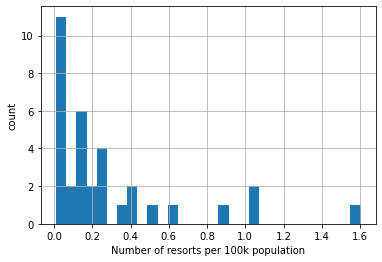

In [402]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

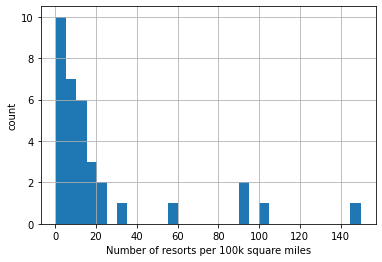

In [403]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

In [404]:
#just zooming in on theirs to make sure it matches ours
state_summary.sort_values('resorts_per_100kcapita', ascending=False).head()

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
28,Vermont,10,1052.0,27.0,4702.0,50.0,1.603,103.993
17,New Hampshire,14,1591.0,33.0,2857.0,376.0,1.030,149.749
15,Montana,11,807.0,19.0,15610.0,710.0,1.029,7.481
33,Wyoming,5,586.0,7.0,3353.0,110.0,0.864,5.112
9,Maine,8,865.0,17.0,3204.0,388.0,0.595,22.612


#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>

In [405]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          1.603
New Hampshire    1.030
Montana          1.029
Wyoming          0.864
Maine            0.595
Name: resorts_per_100kcapita, dtype: float64

In [406]:
#again, not sure why it said something else before, the preloaded output, maybe the data's changed? like w/ number of resorts?
#but they forgot to update the preloaded?
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    149.749
Vermont          103.993
Massachusetts     94.751
Connecticut       90.204
New York          56.823
Name: resorts_per_100ksq_mile, dtype: float64

Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!

In [407]:
#Vermont & New Hampshire are both small states around similar size (rank neigbhors - 6th & 5th smallest respectively by area)
#with a decent/similar number of resorts, and we see it is very decent indeed given their small area and small population
#Vermont is the 2nd smallest state by population and NH is the 10th (thus NH has a bigger population density, 145 vs 65 ppsqmi)
#NH ranks higher on per_area basis cuz it's smaller in area yet has more total resorts
#Vermont ranks higher on per_pop basis cuz, even tho it does have few total resorts, it's smaller by comparison of population
#-less than half pop of NH
#Remem, New Hampshire has 14 resorts and Vermont has 10

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

In [408]:
#######################################################################################################################

#trying to disentangle what it's talking about disentangling
#original feature - the original columns

#derived feature >> like a new, custom, calculated field, like the 'per100k's? guess it must be since thus far we haven't
#scaled yet - cuz my other option / possibility was gonna be that the 'derived' features are the scaled versions of the originals

#but one big question mark is- I'm not sure what it means by 'find linear combinations...that are uncorrelated with each other'
#this probably explains though why I'm not getting the same results when i calculated variance manually my way
#using centered only columns

#explained variance - how much variance is due to different combinations of original features?? not really sure... need to
#understand the 'linear combinations' thing first

#they say use these derived features to visualize data in lower dimension, and specifically say TWO, down from seven...
#so does that mean we're talking about our TWO SPECIFIC DERIVED/100K FEATURES??? like those 2 columns we chose to focus on
#were the derived?

#but if so, how did they become the FIRST two columns when they were the LAST 2 in the original set?

#hopefully it'll make sense later. or will have to watch some videos on it understanding it

##############################################################################################################################

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

You only want numeric data here, although you don't want to lose track of the state labels, so it's convenient to set the state as the index.

In [409]:
state_summary
#confirms no rhode island! was deleted since we deleted all entries that didn't have a weekend price
#and rhode island only HAD one ski resort, and that didn't have a weekend price!!

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
1,Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
2,California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
3,Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204
5,Idaho,9,849.0,17.0,13102.0,315.0,0.504,10.770
6,Illinois,3,143.0,5.0,182.0,182.0,0.024,5.180
7,Indiana,2,157.0,4.0,165.0,165.0,0.030,5.491
8,Iowa,3,100.0,5.0,140.0,140.0,0.095,5.331
9,Maine,8,865.0,17.0,3204.0,388.0,0.595,22.612


In [410]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'

#copy the existing, customized, enhanced state_summary
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#this'll simply be a list of the states

#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns

#so why are we doing all this? saving the column names and index as separate variables?

state_summary_scale.head()

#so overall this just took the df we just made and re/set the index (back) to the state, so now we're left w/ all/only
#numerical fields in the df

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204


In [411]:
len(state_summary_index)

34

In [412]:
#only 34 states in consideration in this study after removing entries w/o weekend price data --> DROPPED RHODE ISLAND

The above shows what we expect: the columns we want are all numeric and the state has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [413]:
state_summary_scale = scale(state_summary_scale)
state_summary_scale

#remem, w/ feature scaling/normalizing/standardizing, there's 2 parts:
#NORMALIZING is subtracting the mean from each datapoint to SHIFT the mean over by that much, aka centering it around / 
#making the new mean 0 (ZERO!!!) (for each column)
#then w/ SCALING/STANDARDIZING, divide everything by the standard deviation to make the standard deviation 1!!!


#(OLD/ALTERNATIVE/ELEMENTARY WAY FOR SCALING/STANDARDIZING: divide the range by itself to make it 1, which we do by dividing
#every number in the range by the range)

#did this manually for just total resorts and nums matched exactly!
# ski_data = pd.read_csv('DataScienceGuidedCapstone\data\ski_data_cleaned_SM.csv')

# state_sum = pd.read_csv('DataScienceGuidedCapstone\data\state_summary.csv')

# state_sum_normaled = state_sum.Total_Resorts - state_sum.Total_Resorts.mean()     #shift everything over by the mean

# state_sum_scaled = state_sum_normaled / state_sum_normaled.std(ddof=0)  #need to spec ddof=0 cuz we got WHOLE POP! not just sample!

# print(state_sum_scaled)

# print(state_sum_scaled.mean())

# print(state_sum_scaled.std(ddof=0))  #again, need this here to make sure we're getting the right stdv! and indeed this does evaluate to exactly 1.0!

# print(state_sum_scaled.max() - state_sum_scaled.min())

array([[-0.74845029, -0.6591177 , -0.81940451, -0.33733213,  0.24278644,
         0.36014657, -0.6600529 ],
       [-0.89992237, -0.83347691, -0.69447288, -0.45356602, -0.67217021,
        -0.71424361, -0.62206821],
       [ 0.61479845,  1.44933719,  0.86717248,  0.88618251, -0.38487382,
        -0.70612004, -0.45959721],
       [ 0.91774262,  2.01761905,  1.42936482,  2.96152788, -0.61727281,
        -0.10874396, -0.2813193 ],
       [-0.44550612, -0.6462022 , -0.44460962, -0.65511525, -0.35010547,
        -0.39759858,  1.95505159],
       [ 0.1603822 ,  0.15455861, -0.00734892,  1.45197536, -0.24214059,
         0.62277618, -0.3594009 ],
       [-0.74845029, -0.985234  , -0.75693869, -0.68421506, -0.48551906,
        -0.72492196, -0.52225891],
       [-0.89992237, -0.96263188, -0.81940451, -0.68702584, -0.51662758,
        -0.70798025, -0.51318593],
       [-0.74845029, -1.05465479, -0.75693869, -0.69115933, -0.56237542,
        -0.52439926, -0.51785755],
       [ 0.00891012,  0.1803

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualise scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [414]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`

#okay so we made a df state_summary_scale that was just a copy of state_summary
#then we scaled(state_summary_scale) which normalized/standardized each column column-wise
#and saved the resultant values as an ndarray/list of list row-wise (but no column headers/names)
#so now we're creating a new df - state_summary_scaled_df - putting/inserting in these scaled numbers WITH column headers
#(which is why we saved the names above!)

state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.748,-0.659,-0.819,-0.337,0.243,0.360,-0.660
1,-0.900,-0.833,-0.694,-0.454,-0.672,-0.714,-0.622
2,0.615,1.449,0.867,0.886,-0.385,-0.706,-0.460
3,0.918,2.018,1.429,2.962,-0.617,-0.109,-0.281
4,-0.446,-0.646,-0.445,-0.655,-0.350,-0.398,1.955


In [565]:
#okay so we don't have the state index

Index(['Total_Resorts', 'Total_Days_Open', 'Total_Terrain_Parks',
       'Total_Skiable_Acres', 'Total_Night_Skiing_Acres',
       'resorts_per_100kcapita', 'resorts_per_100ksq_mile'],
      dtype='object')

In [415]:
#so let's check/verify we got what we were after: the mean of each column should be 0 and the stdv should be 1!:

# state_summary_scaled_df.agg(np.mean, axis=0)
state_summary_scaled_df.describe().loc['mean':'std'].T
# state_summary_scaled_df.agg(np.mean, np.std)

,mean,std
Total_Resorts,-4.245e-17,1.015
Total_Days_Open,4.898e-18,1.015
Total_Terrain_Parks,2.286e-17,1.015
Total_Skiable_Acres,4.000e-17,1.015
Total_Night_Skiing_Acres,3.265e-17,1.015
resorts_per_100kcapita,1.502e-16,1.015
resorts_per_100ksq_mile,3.918e-17,1.015


In [416]:
#There you go! A little messy to look at at first, but when you look closely you realize it is just mean=0 and stdv=1, just
#won't always be EXACTLY perfect
#can help if we round:

pd.set_option('precision', 1)
#state_summary_scaled_df.describe().loc['mean':'std'].T

#oh, for some reason that doesn't really help our scientific notation situation lol, have to fig that out separately
#maybe just do round()?:

# round(state_summary_scaled_df.describe().loc['mean':'std'].T)

#haha okay so that worked, except it left some as "-0.0" cuz they rounded up from down/below 0
#so to fix that, wrap that whole thing in an abs!

abs(round(state_summary_scaled_df.describe().loc['mean':'std'].T))

##################################################################################################################
#NOTE THOUGH THAT THIS STD IS THE SAMPLE STD AND NOT THE POPULATION - ANY WAY TO GET THAT HERE/THRU THIS METHOD??
#CAN ONLY GET IF YOU DO SEP W/ DDOF=0? since default is ddof=1

#difference doesn't show here cuz rounded to only 1 dec place, but if let out, would show not exactly 1.0 on the nose

#tada

,mean,std
Total_Resorts,0.0,1.0
Total_Days_Open,0.0,1.0
Total_Terrain_Parks,0.0,1.0
Total_Skiable_Acres,0.0,1.0
Total_Night_Skiing_Acres,0.0,1.0
resorts_per_100kcapita,0.0,1.0
resorts_per_100ksq_mile,0.0,1.0


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [417]:
#already did this above in one fell swoop^

#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

Total_Resorts              -4.2e-17
Total_Days_Open             4.9e-18
Total_Terrain_Parks         2.3e-17
Total_Skiable_Acres         4.0e-17
Total_Night_Skiing_Acres    3.3e-17
resorts_per_100kcapita      1.5e-16
resorts_per_100ksq_mile     3.9e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [418]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
pd.set_option('precision', 3)
state_summary_scaled_df.std()

Total_Resorts               1.015
Total_Days_Open             1.015
Total_Terrain_Parks         1.015
Total_Skiable_Acres         1.015
Total_Night_Skiing_Acres    1.015
resorts_per_100kcapita      1.015
resorts_per_100ksq_mile     1.015
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [419]:
#ddof=0 is for population, so why is it saying scale() made estimate of 'sample'? confusing
#good reminder about this stuff:
#ddof - "delta degrees of freedom"
#for .std(), the default ddof=1, which is N-1, meaning a SAMPLE! but in this case we have the FULL COMPLETE POPULATION
#and so want the stdv based on that, which means we need JUST N, thus/so ddof=0!!
#confusing bc official documentation says ddof default is 0…
#so the ddof=0 i.e. POPULATION stdv, is also called the "biased estimator"?
#so let's compute POPULATION std:
state_summary_scaled_df.std(ddof=0)

Total_Resorts               1.0
Total_Days_Open             1.0
Total_Terrain_Parks         1.0
Total_Skiable_Acres         1.0
Total_Night_Skiing_Acres    1.0
resorts_per_100kcapita      1.0
resorts_per_100ksq_mile     1.0
dtype: float64

In [420]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

Total_Resorts               1.0
Total_Days_Open             1.0
Total_Terrain_Parks         1.0
Total_Skiable_Acres         1.0
Total_Night_Skiing_Acres    1.0
resorts_per_100kcapita      1.0
resorts_per_100ksq_mile     1.0
dtype: float64

In [421]:
state_summary_scaled_df.var(ddof=0)

Total_Resorts               1.0
Total_Days_Open             1.0
Total_Terrain_Parks         1.0
Total_Skiable_Acres         1.0
Total_Night_Skiing_Acres    1.0
resorts_per_100kcapita      1.0
resorts_per_100ksq_mile     1.0
dtype: float64

In [422]:
#confirm that the variances and stdvs are all 0!

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

In [423]:
#okay so their custom SCALE() function is smart, they programmed its default ddof to 0 / POPULATION for the standard deviation
#for / in / when it needed to divide all the members by their standard deviation
#when we did it manually (subtracting by mean, then dividing by stdv), we had to SPECIFY that stdv as ddof=0 / POPULATION,
#and then again, as we just did above, in the double-checker, for NEW stdv(ddof=0) of the new normalized/standardized bunch!

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [424]:
state_pca = PCA().fit(state_summary_scale)

#this is to TRAIN the model / for it to LEARN? -> .fit()
#then later we will use transform to project?

#state summary scale is JUST the ndarray of scaled values using scale() on state_summary
#so what does PCA() .fit() do??
#comes from:
#sklearn.decomposition.PCA

In [425]:
state_summary_scaled_df.var(ddof=0)

#ahh okay, this isn't gonna get us what we want bc scale() centered AND scaled our data and PCA needs it to be centered but
#NOT SCALED! the whole point in PCA is to see the variance between the columns; otherwise if we scale it the var
#(avg squared diff w/ the mean) will be 1!!! as we see here
#NOTE, the avg squared diff being 1 DOESN'T MEAN the *'AVERAGE DIFFERENCE' is 1!!! you'll see it could be various things,
#like .77 for total resorts after normalizing/standardizing, which/whose square is .59! interesting

Total_Resorts               1.0
Total_Days_Open             1.0
Total_Terrain_Parks         1.0
Total_Skiable_Acres         1.0
Total_Night_Skiing_Acres    1.0
resorts_per_100kcapita      1.0
resorts_per_100ksq_mile     1.0
dtype: float64

In [426]:
#remem, stdv is just the sqrt of the var, so w/ standardizing, since we made the stdv 1, the VAR is also 1
#(the average squared differences w/ the mean)
#again, we know / it makes sense the var's gotta be 1, because the sum of the sqdffs has to be N,
#and there's N number of terms being summed, and so if the AVG term, i.e. the 'avg squared diff' is 1, those would sum to N!!

In [427]:
state_summary_scale.var(ddof=0)
#again, this won't show us what we're looking for bc these numbers in this ndarray have ALREADY BEEN SCALED!!!
#so var MUST necessarily be 1!!! as below

0.9999999999999999

In [428]:
#did these couple lines below / couplet to manually test whether my formula below that was calculating right, subtracting
#columnwise every value/every row of it by the column's mean, and it seemed to do so correctly

In [429]:
state_summary_newind.Total_Night_Skiing_Acres.head()

state
Alaska         580.0
Arizona         80.0
California     237.0
Colorado       110.0
Connecticut    256.0
Name: Total_Night_Skiing_Acres, dtype: float64

In [430]:
state_summary_newind.Total_Night_Skiing_Acres.mean()

447.3235294117647

In [431]:
state_summary.head()

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
1,Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
2,California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
3,Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204


In [432]:
#reduce/center each column by simply subtracting by its mean!
#technically they want / prefer you to drop the non-numeric columns you don't need first, which we'd do by:
#state_summary_centered = state_summary.drop('state') >> except state is the INDEX, so would have to lose that, w/ reset_index(drop=True)?
#OR USE A STATE-INDEXED VERSION LIKE I SHOULD'VE!, bc, the way we/they did it, they never sent state back to index as/@t
#the original dataset, they only did that once/combined it with SCALING the whole thing! so let's make it!
#we only had the state-indexed version PRIOR to converting/adding-n'dropping the per100k columns!

state_summary_stateind = state_summary.set_index('state')
state_summary_stateind.head()


,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204


In [433]:
#this will subtract from each cell/position/row of each column that column's corresponding mean 
state_summary_centered = state_summary_stateind - state_summary_stateind.mean()
state_summary_centered

#then we can check the means to prove/check/confirm this worked! should all be ~0

state_summary_centered.mean()

#perfecto

Total_Resorts              -2.090e-16
Total_Days_Open             1.337e-14
Total_Terrain_Parks         4.180e-16
Total_Skiable_Acres         2.140e-13
Total_Night_Skiing_Acres    2.842e-14
resorts_per_100kcapita      5.878e-17
resorts_per_100ksq_mile     9.927e-15
dtype: float64

In [434]:
#and we can confirm now that we fixed ^ to right dataset that had 100k cols that those corresponding rows

In [435]:
#(OLD)look above and below here - why did this change the order of the columns???
#FIXED - for some reason when i fixed the above to form from state indexed rather than the og, it liked that better

In [436]:
state_summary_centered.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,-4.941,-408.265,-13.118,-2040.235,132.676,0.128,-22.654
Arizona,-5.941,-516.265,-11.118,-2743.235,-367.324,-0.254,-21.350
California,4.059,897.735,13.882,5359.765,-210.324,-0.251,-15.774
Colorado,6.059,1249.735,22.882,17911.765,-337.324,-0.039,-9.655
Connecticut,-2.941,-400.265,-7.118,-3962.235,-191.324,-0.142,67.099


In [437]:
state_summary_centered.var(ddof=0)
#average squared difference with the mean

#here we confirm the var's are NOT all perfect 1.0 like scaled data above

#also confirm that the order of columns is now correct/lines up now that we used correct version of ss (custom ss_stateind) for _centered!

Total_Resorts               4.358e+01
Total_Days_Open             3.837e+05
Total_Terrain_Parks         2.563e+02
Total_Skiable_Acres         3.658e+07
Total_Night_Skiing_Acres    2.986e+05
resorts_per_100kcapita      1.268e-01
resorts_per_100ksq_mile     1.178e+03
dtype: float64

In [438]:
#see the top ones pretty much line up w/ last version when we accidentally used the non-100k version, and so we see that's
#fixed, looking at the row names and the corresponding values changed too of course

In [439]:
#so now we have the individual variance of each (of the seven) factor(s)
state_summary_centered.var(ddof=0).cumsum()

#not sure if this is the same total as when we had w/ state-indexing and it showed in wrong order?

Total_Resorts               4.358e+01
Total_Days_Open             3.837e+05
Total_Terrain_Parks         3.840e+05
Total_Skiable_Acres         3.696e+07
Total_Night_Skiing_Acres    3.726e+07
resorts_per_100kcapita      3.726e+07
resorts_per_100ksq_mile     3.726e+07
dtype: float64

<AxesSubplot:>

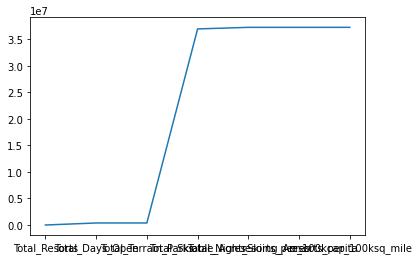

In [440]:
state_summary_centered.var(ddof=0).cumsum().plot()

In [441]:
#a little hard/confusing to read, but seems to confirm what we saw below, that FIRST 2 factors - total days open and
#night skiing acres have the biggest (contribution to total) variance, and total skiable acres also has good amt

#but lets plot as cumulative PORTIONS, like the exercise is getting us to do, so it adds to 1.0:

pd.set_option('precision', 3)

#this gives us just the variance itself for each column
state_summary_centered_var = state_summary_centered.var(ddof=0)
#this converts that into a df and assigns it a column name
state_summary_centered_var = pd.DataFrame(state_summary_centered_var,columns=['var'])
#this adds the percentage of each feature's variance out of the total sum variance of all features
state_summary_centered_var['pct'] = state_summary_centered_var / state_summary_centered_var.sum()
#this gives us the cumulative percentage/portion of variance w/ each 'increasing' feature till we get to full 1.0
state_summary_centered_var['cum_pct'] = state_summary_centered_var.pct.cumsum()
#state_summary_centered_var['cum abso'] = state_summary_centered_var.cumsum()
state_summary_centered_var


,var,pct,cum_pct
Total_Resorts,4.358e+01,1.170e-06,1.170e-06
Total_Days_Open,3.837e+05,1.030e-02,1.030e-02
Total_Terrain_Parks,2.563e+02,6.877e-06,1.030e-02
Total_Skiable_Acres,3.658e+07,9.817e-01,9.920e-01
Total_Night_Skiing_Acres,2.986e+05,8.014e-03,1.000e+00
resorts_per_100kcapita,1.268e-01,3.403e-09,1.000e+00
resorts_per_100ksq_mile,1.178e+03,3.161e-05,1.000e+00


<AxesSubplot:>

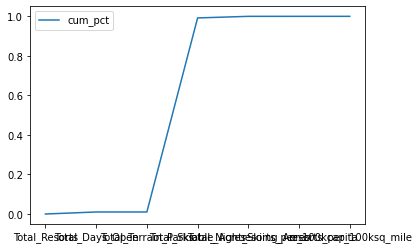

In [442]:
#same thing as above
state_summary_centered_var.plot(y='cum_pct')

In [443]:


#######################################################################################################################
#hmm okay, so as we saw above and in tables, this is saying that it's COMPLETELY (like 98%) about the total skiiable acres
#i'm pretty sure that's what it said before too............ can't be right
#so maybe it's possible it looks at variance a different way? or from the original data?? like not even centered??
#######################################################################################################################



Plot the cumulative variance ratio with number of components.

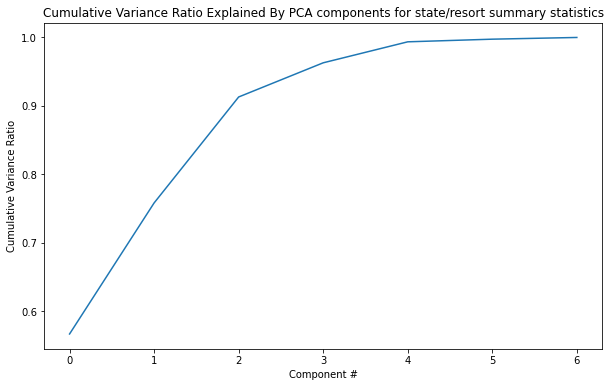

In [444]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum()) #explained_variance / explained_variance_ratio are among attributes
#included in the PCA() function
plt.xlabel('Component #')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio Explained By PCA components for state/resort summary statistics');

############################################################################################################
#i thought point of PCA / the only way PCA can work is if the numbers AREN'T scaled, otherwise
#the variance for everything will just be 1.... but we used state_scaled to load into our PCA function...
#############################################################################################################

In [445]:
#the first one alone, (do we assume it's the first one in the table - total resorts?, accounts for over 50% of the total variance (that's where the graph starts)
#the first two are over 75% (if we assume the second in the dataset, +Days Open), and first three over 90%!! (+Total Terrain Parks). convenient that they basically

#lined up in order of biggest proportions to lowest, making the cum graph smoov!
#oh/ohr wait - did it say that it INTENTIONALLY/was MADE/DESIGNED that way/to do that? -> put in descending order of variance
#yeah pretty sure that was by design
#oh wait, but if it DOES rearrange the columns, it doesn't tell us!!
#cuz if we combine w/ ours/manually run data, it's def not the first one or two features that contribute



In [446]:
#lets see what these values look like compared to ours in table form
state_pca.explained_variance_ratio_

#so can we safely say that the order these correspond to are the order in the original training set - state_summary/_scale:
#from which this was calculated off of?:
#Total Resorts, Days Open, Terrain Parks...

array([0.56647397, 0.19159512, 0.15491311, 0.04996592, 0.03068559,
       0.00386811, 0.00249818])

In [447]:
state_pca.explained_variance_

array([4.08547895, 1.38180719, 1.11725214, 0.36036031, 0.2213082 ,
       0.02789725, 0.01801717])

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

**Note:** It is important to move quickly when performing exploratory data analysis. You should not spend hours trying to create publication-ready figures. However, it is crucially important that you can easily review and summarise the findings from EDA. Descriptive axis labels and titles are _extremely_ useful here. When you come to reread your notebook to summarise your findings, you will be thankful that you created descriptive plots and even made key observations in adjacent markdown cells.

Apply the transformation to the data to obtain the derived features.

In [448]:
state_summary_scale.shape
#showing 34 rows now... wasn't 35? didn't check before - got tipped off from below when doing shape on state_pca_x

#oh cuz RHODE ISLAND #dropped

(34, 7)

In [449]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument

#.transform() applies dimensionality reduction to the dataset
state_pca_x = state_pca.transform(state_summary_scale)

#so .transform() takes state_pca, which we trained earlier / which learned from state_summary_scale
#so now it will PROJECT onto the model it made based off how it was trained / what it learned/on
#i guess it's basically projecting like the 'trend line' of what the values SHOULD be?

In [450]:
state_pca_x.shape
#showing 34 rows now... but was 35 before?? CUZ RHODE ISLAND ISSUE

(34, 7)

In [451]:
state_pca_x

#so the order of these columns is the same as what they are transformed from, assumably, i.e. state_summary_scale,
#so: Total Resorts, Days Open, Terrain Parks, etc

array([[-1.15265449e+00, -1.81474341e-02,  6.12339169e-02,
        -8.78107050e-01,  4.34975969e-01,  2.64666751e-01,
        -2.02818738e-01],
       [-1.81639709e+00, -4.44800711e-01, -3.62194467e-02,
         1.19881669e-01, -1.14520010e-01, -9.60705817e-02,
        -7.94381379e-02],
       [ 1.23705210e+00, -8.09938978e-01,  9.90405765e-01,
         8.12166534e-01, -1.01661944e+00,  1.10250703e-01,
        -3.65858224e-02],
       [ 2.45326773e+00, -2.23107500e-01,  2.77151936e+00,
         1.34600347e+00, -7.49295951e-01, -2.27146421e-01,
        -1.56129560e-01],
       [-6.48761836e-01,  1.03594604e+00, -1.42764309e+00,
         1.21500407e+00,  5.80776847e-01, -2.90468301e-03,
         2.43029499e-03],
       [ 4.06428137e-01,  3.70318542e-01,  1.52911737e+00,
        -4.72225260e-02,  2.32396020e-01, -1.53022050e-01,
         1.15651678e-01],
       [-1.80152755e+00, -4.77217046e-01, -3.43556004e-01,
         1.03266058e-02,  2.44338243e-02, -9.86466078e-02,
         6.5284859

In [452]:
############################################
#does the explained variance stuff in any way inform the transformation??
############################################

In [453]:
#so, what did this do? it's still the same 35 states/rows by 7 features/columns? thought the point was to reduce DIMENSIONS!

#checked below and these values ARE different from the original state_summary_scale - but what happened??

#and what role does the variances of the features we just found play now?
#like it's not like we took out the small-variance contributing ones - or would we wanna keep those and take out the LARGE
#VARIANCE ONES!!

In [454]:
state_summary_scale

array([[-0.74845029, -0.6591177 , -0.81940451, -0.33733213,  0.24278644,
         0.36014657, -0.6600529 ],
       [-0.89992237, -0.83347691, -0.69447288, -0.45356602, -0.67217021,
        -0.71424361, -0.62206821],
       [ 0.61479845,  1.44933719,  0.86717248,  0.88618251, -0.38487382,
        -0.70612004, -0.45959721],
       [ 0.91774262,  2.01761905,  1.42936482,  2.96152788, -0.61727281,
        -0.10874396, -0.2813193 ],
       [-0.44550612, -0.6462022 , -0.44460962, -0.65511525, -0.35010547,
        -0.39759858,  1.95505159],
       [ 0.1603822 ,  0.15455861, -0.00734892,  1.45197536, -0.24214059,
         0.62277618, -0.3594009 ],
       [-0.74845029, -0.985234  , -0.75693869, -0.68421506, -0.48551906,
        -0.72492196, -0.52225891],
       [-0.89992237, -0.96263188, -0.81940451, -0.68702584, -0.51662758,
        -0.70798025, -0.51318593],
       [-0.74845029, -1.05465479, -0.75693869, -0.69115933, -0.56237542,
        -0.52439926, -0.51785755],
       [ 0.00891012,  0.1803

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

In [455]:
#so what exactly is a 'derived' feature and a 'principle component'?

In [456]:
#testing to understand piece/line in below code
state_pca.explained_variance_ratio_.cumsum()[1]

0.7580690867093711

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

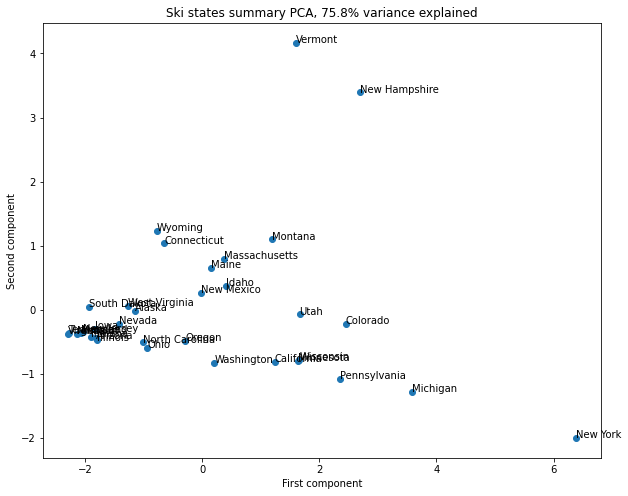

In [457]:
x = state_pca_x[:, 0] #gives ALL rows of the entire 1st column (total resorts??) --> will be the x-axis
y = state_pca_x[:, 1] #gives ALL rows of the entire 2nd column (total days open??) --> will be the y-axis
#so we're gonna plot total days open in the state against/vs. the total number of resorts in the state to see if
#there's a correlationship -> more resorts means more days open? presumably, but changes depending on avg days open per resort in each state
state = state_summary_index
#the list of states derived from the index, to be used as a list
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
#this is the set/list/array of cum sum of proportions of variance we saw earlier, turns them into a percentage
#since this is a list/array, the [1] subsets the second element of that list/array, which is the cumulative proportion
#of variance for Total Days Open + Night Skiing Acres! >> 76%
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component') #of PCA principle components (but why not label as / call them what they are - days open?)
plt.ylabel('Second component') # " " " (night skiing acres)
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained') #we use our variable representing the 76% variance
for s, x, y in zip(state, x, y):                                       #from the first 2 variables
    plt.annotate(s, (x, y))

#"Take the first value in the states list and use it as the label for the first point, which of course is simply comprised
#of the first x & the first y - pair!"


#zipping will combine those 3 lists, which are the same length as they should/as is required, into tuple triplet-pairs
#plt.annotate() places the given text @ (x,y) coordinate pair
#in this case, the text is the state name
#then fills in the text at (x,y)
#now remem, the s, x, y represent the CURRENT ELEMENT in the respective 3 lists, state, x, y
#so it's gonna start off w/ the 1st state in the list, state[0] = 'Alaska'
#and put it at x[0] = 117 (made up; days open)
# &
# y[0] = 4700 (made up; night skiing acres)

#just wrote this cuz thought occurred to me oh it automatically starts at 0 so does that mean it puts in the coordinate pair
#(0,0) - but then that obviously isn't literal, that's more like (x[0], y[0]), just like it's being put on at state[0].
#we know it can't be literal like^ line above cuz, just as literal coordinate (0,0) wouldn't make sense,
#it obviously wouldn't make sense to place '0' as the label!
#so yes, python does start w/ 0 - but NOT as the literal number to fill in, but as an index, i.e. IT SIMPLY STARTS AT THE
#***BEGINNING**** OF WHATEVER LIST YOU TELL IT TO ITERATE/RUN THRU, which always starts w/ row/position/element [0]!!!
    

In [458]:
#hmm so it's not clear if we labeled the fields right for which columns/features these were
#but we see the y-axis is a field where Vermont is #1, followed by NH, and they're way ahead of the pack
#there's no exact match but at least for Vermont that's described by 'RESORTS PER 100K CAPITA' - but then the rest doesn't quite line up
#i mean NH is number 2, but it's exactly the same as Montana, but chart shows it way ahead...?
#nothing else works

#then for the x-axis, it's something where New York is way out in front, followed by Michigan,
#New Hampshire/Colorado/Pennsylvania (neck-n-neck)...
#well, not an exact match, but Total Resorts & Total Terrain Parks are  pretty close...
#Total Days Open is in the ballpark
#Total Night Skiing Acres only works for the top 3

In [459]:
#so Vermont & New Hampshire both hit very heavy on the 'second component', huge frontrunners,
#and then pretty good w/ first componenent too
#interestingly, New York singlehandedly DOMINATES the first component but GETS DOMINATED in the second component (dead last)

In [460]:
#so remem how the .annotate slaps on the label using the coordinate pair
#so let's explore x & y, just to make sure they indeed line up...
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
# for x,y in zip(x,y):
#     print(x,y)
x

array([-1.15265449, -1.81639709,  1.2370521 ,  2.45326773, -0.64876184,
        0.40642814, -1.80152755, -1.90371115, -1.83114505,  0.15086679,
       -2.0594975 ,  0.37301675,  3.58329236,  1.63117239, -2.1382938 ,
        1.19776584, -1.41454551,  2.69037433, -2.02765232, -0.01909947,
        6.37432969, -1.00122522, -0.94048888, -0.28960195,  2.35182532,
       -1.92876224, -2.28095644,  1.66338127,  1.59549911, -2.28438635,
        0.21046047, -1.26160917,  1.65757114, -0.77598742])

In [461]:
#okay so we do see the 6.37 outlier representing New York....
#now y:
y

array([-0.01814743, -0.44480071, -0.80993898, -0.2231075 ,  1.03594604,
        0.37031854, -0.47721705, -0.42576786, -0.29990261,  0.65489087,
       -0.35378222,  0.79351947, -1.28135882, -0.79837159, -0.36878014,
        1.09999833, -0.21376116,  3.39259326, -0.33874749,  0.27084988,
       -1.99827197, -0.50665942, -0.59374592, -0.48347048, -1.07315628,
        0.04440018, -0.3601924 , -0.07140094,  4.16722869, -0.37382676,
       -0.83026362,  0.06038931, -0.77461768,  1.22915443])

In [462]:
#okay and there we see the 4.16 & 3.39 representing vermont & new hampshire...

In [463]:
#remem, these values came from 'state_pca_x' - which was a TRANSFORMED version of state_summary_scale

In [464]:
state_summary.sort_values('resorts_per_100ksq_mile', ascending=False)

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
17,New Hampshire,14,1591.0,33.0,2857.0,376.0,1.030,149.749
28,Vermont,10,1052.0,27.0,4702.0,50.0,1.603,103.993
11,Massachusetts,10,566.0,17.0,1121.0,545.0,0.145,94.751
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204
20,New York,31,2263.0,71.0,5379.0,2710.0,0.159,56.823
24,Pennsylvania,16,1244.0,44.0,1703.0,1343.0,0.125,34.742
12,Michigan,23,1845.0,48.0,3396.0,1457.0,0.230,23.781
9,Maine,8,865.0,17.0,3204.0,388.0,0.595,22.612
32,Wisconsin,13,1376.0,36.0,1650.0,965.0,0.223,19.849
31,West Virginia,4,342.0,9.0,542.0,187.0,0.223,16.508


In [465]:
#original data set, unscaled/unnormalized
state_summary_newind.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,state_population,state_area_sq_miles
state,,,,,,,
Alaska,3,345.0,4.0,2280.0,580.0,731545,665384
Arizona,2,237.0,6.0,1577.0,80.0,7278717,113990
California,12,1651.0,31.0,9680.0,237.0,39512223,163695
Colorado,14,2003.0,40.0,22232.0,110.0,5758736,104094
Connecticut,5,353.0,10.0,358.0,256.0,3565278,5543


In [466]:
#original data set ONLY centered, NOT scaled:
state_summary_centered.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,-4.941,-408.265,-13.118,-2040.235,132.676,0.128,-22.654
Arizona,-5.941,-516.265,-11.118,-2743.235,-367.324,-0.254,-21.350
California,4.059,897.735,13.882,5359.765,-210.324,-0.251,-15.774
Colorado,6.059,1249.735,22.882,17911.765,-337.324,-0.039,-9.655
Connecticut,-2.941,-400.265,-7.118,-3962.235,-191.324,-0.142,67.099


In [467]:
#scaled/normalized version of data
state_summary_scaled_df.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.748,-0.659,-0.819,-0.337,0.243,0.360,-0.660
1,-0.900,-0.833,-0.694,-0.454,-0.672,-0.714,-0.622
2,0.615,1.449,0.867,0.886,-0.385,-0.706,-0.460
3,0.918,2.018,1.429,2.962,-0.617,-0.109,-0.281
4,-0.446,-0.646,-0.445,-0.655,-0.350,-0.398,1.955


In [468]:
state_pca_x_df = pd.DataFrame(np.array(state_pca_x), columns=[state_summary_scaled_df.columns])
state_pca_x_df.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-1.153,-0.018,0.061,-0.878,0.435,0.265,-0.203
1,-1.816,-0.445,-0.036,0.120,-0.115,-0.096,-0.079
2,1.237,-0.810,0.990,0.812,-1.017,0.110,-0.037
3,2.453,-0.223,2.772,1.346,-0.749,-0.227,-0.156
4,-0.649,1.036,-1.428,1.215,0.581,-0.003,0.002


#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in ticket prices. You know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [469]:
#wait so is this saying that in the above plot, for the 2 diminesions we narrowed down to, one of them is total skiiable acres?
#or is it just saying that's ONE of the things it factored
#so it's telling us the relationship between the states, but looking at what? like what do the axes represent?
#is it some kind of blend of all 7, or one axi is looking at one kind of blend / partial blend and other is (an)other?
#but what are we supposed to make of it by looking at it? that VT/NH are really high in something and NY is really high
#in something else? (and also really LOW in the thing that VT/NH are really HIGH in!)

In [470]:
#ahhhh okay, so i think i'm slowly/gradually starting to understand one small little piece/nugget/tidbit at a time

#so Vermont & New Hamsphire dominate in one area and New York dominates in another (and GETS dominated in the 
#feature that VT&NH dominate)....
#so it could be that the y-axis represents the DERIVED FEATURES and x is ORIGINAL! that seems to be very consistent
#w/ the story!

#also, there's something to do w/ how features are CORRELATED

In [471]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [472]:
#Code task 8#
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333
Arizona        83.500
California     81.417
Colorado       90.714
Connecticut    56.800
Name: AdultWeekend, dtype: float64

In [473]:
ski_data[ski_data['state']=='Rhode Island']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [474]:
#okay good, corrected now after replaced ski_data w/ right, cleaned one! NO RHODE ISLAND because it only HAD 1 ski resort
#and that had missing weekend price data!

In [475]:
#I was gonna say, don't we wanna use the CLEANED file >> ski_data_cleaned??
#but i forgot, we saved ski_data_cleaned TO the variable ski_data!!! which is what we're working with here

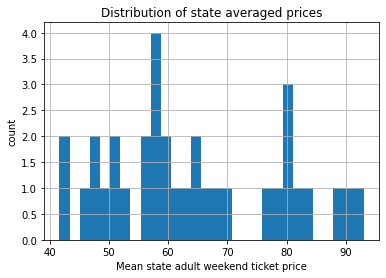

In [476]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

#okay good aH it's exactly the same when i ran it vs. what they had preloaded. no reason it shouldn't be, running the same
#code referring to the same files, but always good/reassuring to double check

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [477]:
#okay so they're saying we only extracted the "FIRST TWO" principle components - so meaning ALL 7 were principle components??
#wasn't the point to narrow it down from 7 to lower / 2?

In [478]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:,0], 'PC2': state_pca_x[:,1]}, index=state_summary_index)
pca_df.head()
#remem, 'state_summary_index' was simply the saved index of the state names from above/earlier

#okay so this is like what i did on my own, where we basically convert state_pca_x to a df
#but in this case we're ONLY putting the first to principle componenets to it (below this/next block)
#also we didn't state-index it

#this wouldn't have changed after i fixed the ski_data cleaned problem, would it?
#well, this is based off of state_pca_x, which is based off state_pca, which is based off, which uses state_summary_scale,
#which was based off state_summary, WHICH WAS FINE BECAUSE WE KEPT/USED THE WORKBOOK'S SAME NAME FOR IT AND OVERWROTE IT
#USING THE RIGHT UPDATED DATA!
#i'm not sure if it was intended or not, but my state_summary & state_summary_index was updated AFTER we dropped rows
#w/ missing price data, so it DOES NOT CONTAIN RHODE ISLAND

,PC1,PC2
state,,
Alaska,-1.153,-0.018
Arizona,-1.816,-0.445
California,1.237,-0.810
Colorado,2.453,-0.223
Connecticut,-0.649,1.036


In [479]:
pca_df_redo = pd.DataFrame({'PC1': state_pca_x[:,0], 'PC2': state_pca_x[:,1]}, index=state_summary_index)

pca_df_redo#.loc['Rhode Island']

#okay, this is very interesting.
#so down below when we were checking to see if there were any missing values, we saw that rhode island was totally blank
#this would explain why - because according to state_pca_x - there IS no such thing as rhode island!!!

#cuz state_summary_index was based on state_summary, which i had updated to refer to ski_resort_data AFTER updating it to
#not include places w/ missing weekday & weekend prices! RI only had one and that one was in that situation so was deleted

#so when i originaly ran this, why was there a RI? where did that come from?
#>>>okay, so that was become we were combining/merging this with STATE_AVERAGE_PRICE, which was based on a groupby
#of the original/incorrect/since corrected/UNCLEANED ski_data WHICH OF COURSE CONTAINED RHODE ISLAND!!!! and since that
#was of course blank for weekend price, THAT'S WHY WE GOT AN NAN!!!!

,PC1,PC2
state,,
Alaska,-1.153,-0.018
Arizona,-1.816,-0.445
California,1.237,-0.810
Colorado,2.453,-0.223
Connecticut,-0.649,1.036
Idaho,0.406,0.370
Illinois,-1.802,-0.477
Indiana,-1.904,-0.426
Iowa,-1.831,-0.300


In [480]:
#confirms that rhode island ISN'T in the state summary index!
state_summary_index

#okay so no rhode island in the state_summary index, which was formed from the scaled data, and rightly so cuz rhode island
#was removed when we cleaned the data cuz we removed anything without a weekend price and RI only HAD one resort and that
#didn't have a weekend price! so RI was wiped out

Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'South Dakota',
       'Tennessee', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [481]:
state_pca_x_df.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-1.153,-0.018,0.061,-0.878,0.435,0.265,-0.203
1,-1.816,-0.445,-0.036,0.120,-0.115,-0.096,-0.079
2,1.237,-0.810,0.990,0.812,-1.017,0.110,-0.037
3,2.453,-0.223,2.772,1.346,-0.749,-0.227,-0.156
4,-0.649,1.036,-1.428,1.215,0.581,-0.003,0.002


That worked, and you have state as an index.

In [482]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333
Arizona        83.500
California     81.417
Colorado       90.714
Connecticut    56.800
Name: AdultWeekend, dtype: float64

In [483]:
#rerun to show Rhode Island is a goner!:
state_avg_price

state
Alaska            57.333
Arizona           83.500
California        81.417
Colorado          90.714
Connecticut       56.800
Idaho             57.444
Illinois          43.333
Indiana           48.500
Iowa              41.667
Maine             61.000
Maryland          79.000
Massachusetts     57.200
Michigan          53.043
Minnesota         49.667
Missouri          48.000
Montana           51.909
Nevada            81.000
New Hampshire     76.500
New Jersey        79.990
New Mexico        65.667
New York          59.781
North Carolina    64.167
Ohio              45.400
Oregon            59.857
Pennsylvania      63.688
South Dakota      51.500
Tennessee         65.000
Utah              93.000
Vermont           87.900
Virginia          68.000
Washington        70.144
West Virginia     79.750
Wisconsin         55.846
Wyoming           57.600
Name: AdultWeekend, dtype: float64

In [484]:
#it's gone! outta here!

In [485]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

#nicee, look to see how it nicely converted the above 'series' / 'pivot table' to a smooth/textured df below

#oh but how come we didn't save it? either in place or save it as like 'state_avg_price_df'?

,AdultWeekend
state,
Alaska,57.333
Arizona,83.500
California,81.417
Colorado,90.714
Connecticut,56.800


In [486]:
#to check why rhode island shows all NaN below. trying to see the source. even here it was NaN for average price. that means
#it had at least one missing price, and nullified the WHOLE THING/COLUMN because of it
state_avg_price.to_frame()

,AdultWeekend
state,
Alaska,57.333
Arizona,83.500
California,81.417
Colorado,90.714
Connecticut,56.800
Idaho,57.444
Illinois,43.333
Indiana,48.500
Iowa,41.667


In [487]:
#no RI check

Now you can concatenate both parts on axis 1 and using the indexes.

In [488]:
#combine
#so we're keeping the original pca_df and now adding the df we just made to it


#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df_redo, state_avg_price], axis=1)
#had to use pca_df_REDO cuz messed it up as i was playing around
pca_df.head()

#interesting, so you don't have to have df's, or at least BOTH/ALL elements being combined don't need to be df's
#for it to work
#but then what was the point of doing the .to_frame()? we didn't save it tho so i guess there's that...

#remem, concating along axis=1 means will stack/line-up SIDE-BY-SIDE!

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.153,-0.018,57.333
Arizona,-1.816,-0.445,83.500
California,1.237,-0.810,81.417
Colorado,2.453,-0.223,90.714
Connecticut,-0.649,1.036,56.800


In [489]:
#is this the same as if we joined / MERGED the two on index 'state'??:


pca_df_state_avg_merge = pca_df_redo.merge(state_avg_price, left_index=True, right_index=True)
pca_df_state_avg_merge.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.153,-0.018,57.333
Arizona,-1.816,-0.445,83.500
California,1.237,-0.810,81.417
Colorado,2.453,-0.223,90.714
Connecticut,-0.649,1.036,56.800


In [490]:
#can also simply do a .join()!! - that's by far the easiest way!
pca_df_state_avg_join = pca_df_redo.join(state_avg_price)
pca_df_state_avg_join.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.153,-0.018,57.333
Arizona,-1.816,-0.445,83.500
California,1.237,-0.810,81.417
Colorado,2.453,-0.223,90.714
Connecticut,-0.649,1.036,56.800


In [491]:
#success again!! aH

You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [492]:
#hmm okay, so cool idea. so we wanna add to the plot and make it more detailed/informative/POP
#by distinguishing the dots based on AVG TICKET PRICE IN THAT STATE!
#then we'll see if we notice any trends/groupings, like that the more expensive states tend to be the more....
#well whatever those PC's represent!
#but in any case, we're tryna see what's the best predictor of price
#where's the correlation
#is it the states with the most resorts per capita?
#resorts per land?
#the most skiiable acres/per capita
#the most night acres/per capita

In [493]:
#make a new column so we can plot based on it
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

#'q' is the number of quantiles, so q=4 is QUARTILES!
#precision is the decimal places for the bin labels
#i'm confused tho - what is it returning exactly? i'm assuming the 25th & 75th percentile, i.e. the interquartile range?
#OOOOOHHHH okay i get it -> so doing .qcut() divides up ALL THE ADULT WEEKEND AVERAGE PRICES BY STATE and puts it into 4 quartiles
#and so this simply tells you which quartile this state's average price falls into. that's why you see repeats!!
#the avg will be inside of that quartile!

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.153,-0.018,57.333,"(53.7, 60.4]"
Arizona,-1.816,-0.445,83.500,"(78.4, 93.0]"
California,1.237,-0.810,81.417,"(78.4, 93.0]"
Colorado,2.453,-0.223,90.714,"(78.4, 93.0]"
Connecticut,-0.649,1.036,56.800,"(53.7, 60.4]"


In [494]:
pca_df.index  #just checking and making sure no rhode island :)

Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'South Dakota',
       'Tennessee', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [495]:
#NOTE that this is not giving us the quantiles for ALL THE INDIV RESORT PRICES, but rather for the
#DISTRIBUTION OF STATE AVG PRICES!!!
#the former would look like this:
pd.qcut(ski_data.AdultWeekend, q=4).unique().sort_values()
#(this will display to us just the bins/quartiles alone)

[(16.999, 47.0], (47.0, 60.0], (60.0, 78.0], (78.0, 179.0]]
Categories (4, interval[float64, right]): [(16.999, 47.0] < (47.0, 60.0] < (60.0, 78.0] < (78.0, 179.0]]

In [496]:
#wow! look how crazy the last range / quartile is! that's how it tends to be w/ stuff like this. where there's not really
#many extreme small values, but there are several extreme LARGE values and they're very few and very far between,
#and so the last quartile has to capture that! so it might look like / be some ridiculous range. but it's telling / shows
#that there must be VERY FEW values up that high for the range to be so big! cuz remember what the idea is behind
#quantiles - THERE'S THE SAME ***NUMBER*** OF ELEMENTS IN EACH!!!

In [497]:
#let's see how that compares to our state avg distr. the above head didn't show us the other two quartiles:
pca_df['Quartile'].unique()

[(53.7, 60.4], (78.4, 93.0], (41.6, 53.7], (60.4, 78.4]]
Categories (4, interval[float64, right]): [(41.6, 53.7] < (53.7, 60.4] < (60.4, 78.4] < (78.4, 93.0]]

In [498]:
#intersting, much more normalized when we look at AVERAGES rather than LITERAL EVERY SINGLE VALUE! (the majority)
#/ijmaa'a greatly controls the outliers
#NO MORE NAN AFTER FIXING RHODE ISLAND ISSUE!

In [499]:
#interesting too how it doesn't sort it in ascending order?

pca_df['Quartile'].unique().sort_values()
#CAN ALSO DO pca_df.Quartile.cat.categories below! auto orders!!

[(41.6, 53.7], (53.7, 60.4], (60.4, 78.4], (78.4, 93.0]]
Categories (4, interval[float64, right]): [(41.6, 53.7] < (53.7, 60.4] < (60.4, 78.4] < (78.4, 93.0]]

In [500]:
#there we go!

In [501]:
pca_df.Quartile.cat.categories

IntervalIndex([(41.6, 53.7], (53.7, 60.4], (60.4, 78.4], (78.4, 93.0]], dtype='interval[float64, right]')

In [502]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [503]:
#interesting - the data type for the quantiles is CATEGORY! makes sense. like discrete / bins

In [504]:
pca_df

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.153,-0.018,57.333,"(53.7, 60.4]"
Arizona,-1.816,-0.445,83.500,"(78.4, 93.0]"
California,1.237,-0.810,81.417,"(78.4, 93.0]"
Colorado,2.453,-0.223,90.714,"(78.4, 93.0]"
Connecticut,-0.649,1.036,56.800,"(53.7, 60.4]"
Idaho,0.406,0.370,57.444,"(53.7, 60.4]"
Illinois,-1.802,-0.477,43.333,"(41.6, 53.7]"
Indiana,-1.904,-0.426,48.500,"(41.6, 53.7]"
Iowa,-1.831,-0.300,41.667,"(41.6, 53.7]"


In [505]:
#good, still no rhode island

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [506]:
#originally, when was using wrong/old/uncleaned ski_data,
#yes - i noticed in the .unique() of the quartile bins, there was one for NaN!!! that was for rhode island

In [507]:
#ahhhh ok. so the reason why Rhode Island showed up earlier (before i fixed the issue) despite not having RI in the
#state_summary/index, was because RI was still in the state_avg_price at the time bc that was based off original/uncleaned
#ski_data!
#remem, pca_df was formed from / a CONCAT of state_pca_x w/ state_summary_index for its index and state_avg_price
#note very important that the way concat works is, they DON'T HAVE TO HAVE THE SAME NUM OF ROWS!!! for any mismatch, it'll
#just insert the index and leave unhad columns BLANK/NaN!!! (joins based on index?)
#in this interesting case of Rhode Island, it showed NaN's across the board but for diff reasons!!!
#for/in the state_pca_x side, it was NaN because there WAS no RI at all thus of course no data for RI
#for state_avg_price, it contained RI.... ***BUT THERE WAS NO PRICE DATA FOR RI THUS IT ALSO RESULTED IN NAN'S!!!!****
#was that BOTH parts that this concatted
#table was comprised of was based on the OLD/ORIGINAL/UNCLEANED version i had stored for ski_data!
#pca_df was from

In [508]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,


In [509]:
#nice, none! rhode island gone!

In [510]:
#hmmm okay, interesting. so in the preloaded output, rhode island DID have a value for pc1 & pc2. but when i do it, it's all
#NaN! does that have to do with a general rule i set in jupyter for anything w/ missing values to nullify the ENTIRE THING!?

In [511]:
#show the actual/full rows that have ANY blanks
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,


In [512]:
#no more rhode island!

In [513]:
#tell us whether ANY columns have ANY blanks
pca_df.isna().any()

PC1             False
PC2             False
AdultWeekend    False
Quartile        False
dtype: bool

In [514]:
#no missings!

In [515]:
#tell us whether any ROWS have ANY blanks
pca_df.isna().any(axis=1)

state
Alaska            False
Arizona           False
California        False
Colorado          False
Connecticut       False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Missouri          False
Montana           False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
Ohio              False
Oregon            False
Pennsylvania      False
South Dakota      False
Tennessee         False
Utah              False
Vermont           False
Virginia          False
Washington        False
West Virginia     False
Wisconsin         False
Wyoming           False
dtype: bool

In [516]:
#no missings/cuz no RI!

In [517]:
pca_df[pca_df.isna().any(axis=1)]
#the same thing as:
#pca_df[pca_df.isnull().any(axis=1)]
#shows the actual/full rows that have ANY blanks

,PC1,PC2,AdultWeekend,Quartile
state,,,,


In [518]:
#nothing!

Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

In [519]:
#haha funny - so i got around all this because i guess in part_02, when i messed around/got ahead of myself, i reran/rewrote
#state_summary/_index AFTER we dropped stuff and updated CLEANED 'ski_data' that it was based off of
#so originally above showed Rhode Island and it had PC1 & PC2 but no avg price
#the latter is easy to understand because it COULDN'T because there WAS NO PRICES!
#but PC1 & PC2 showed values for RI in the author's post bc that was based on a state_summary that DID have RI still in it /
#included yet, and RI, although/while it didn't have price data, it DID have other data, and thus that's why it still had
#values for 'PC1' & 'PC2' - cuz had data in other areas like total acres, night acres, total parks (1 lol) etc etc
#but we dropped anything that didn't have any price data and rhode island, which only HAD 1 park, was one of them
#and we preemptively, or accidentally, deleted the state_summary definition accordingly :D

In [520]:
#okay so option 1 - to drop RI - is what we already did

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [521]:
#to do Option 2: KEEP RI, i'll have to recreate it w/ RI:

ski_data_wri = pd.read_csv('../raw_data/ski_resort_data.csv')

ski_data_wri = ski_data_wri[ski_data_wri.yearsOpen < 1000]

#ski_data_wri = ski_data_wri[missing_price != 2]
#oh LOL - DON'T INCLUDE THIS! this was the main thing about the cleaned version - that it didn't have ones w/ missing price
#data! so we def don't wanna do that again! make sure to keep those ones w/o price data!!


In [522]:
#state_summary_wri = pd.read_csv('../data/state_summary.csv')
#shoot - ^this won't work bc i saved this w/o rhode island!!! needa manually do it D:

state_summary_wri_premerge = ski_data_wri.groupby('state').agg(
    Total_Resorts = pd.NamedAgg('Name','count'),
    Total_Days_Open = pd.NamedAgg('daysOpenLastYear','sum'),
    Total_Terrain_Parks = pd.NamedAgg('TerrainParks','sum'),
    Total_Skiable_Acres = pd.NamedAgg('SkiableTerrain_ac','sum'),
    Total_Night_Skiing_Acres = pd.NamedAgg('NightSkiing_ac','sum'))


#then gotta add the other two columns D:

#COULD NOT GET THIS TO WORK!!! KEPT FAILING CUZ SSL CERTS EXPIRED ETC
# states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states'
# usa_states = pd.read_html(states_url)

#okay, so we already have the additional states data from the wiki page

usa_states_sub = pd.read_csv('../data/state_summary.csv')[['state', 'state_population', 'state_area_sq_miles']].copy()
#ahhhhhhhhh append won't work how i want it to, keeps adding new columns!
# usa_states_sub = usa_states_sub.append([['Rhode Island',1059361,1545]], ignore_index=True,)

# rhode_island = pd.Series['Rhode Island', 1059361, 1545]

usa_states_sub = usa_states_sub.append({'state':'Rhode Island','state_population':1059361, 'state_area_sq_miles':1545}, ignore_index=True)


state_summary_wri = state_summary_wri_premerge.merge(usa_states_sub, on='state')


resorts_per_capita_wri = (state_summary_wri['Total_Resorts'] / state_summary_wri['state_population']) * 100000
resorts_per_sq_mile_wri = (state_summary_wri['Total_Resorts'] / state_summary_wri['state_area_sq_miles']) * 100000
state_summary_wri['resorts_per_100kcapita'] = 100000 * state_summary_wri.Total_Resorts / state_summary_wri.state_population
state_summary_wri['resorts_per_100ksq_mile'] = 100000 * state_summary_wri.Total_Resorts / state_summary_wri.state_area_sq_miles
state_summary_wri.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)


In [523]:
#DROP DOESN'T WORK
# usa_states_sub.drop(columns=['0','1','2'], axis=1)
# usa_states_sub = usa_states_sub[['state', 'state_area_sq_miles', 'state_population']]
# usa_states_sub.reset_index(inplace=True, drop=True)
usa_states_sub.sort_values('state', inplace=True)
usa_states_sub.reset_index(drop=True, inplace=True)
usa_states_sub

,state,state_population,state_area_sq_miles
0,Alaska,731545,665384
1,Arizona,7278717,113990
2,California,39512223,163695
3,Colorado,5758736,104094
4,Connecticut,3565278,5543
5,Idaho,1787065,83569
6,Illinois,12671821,57914
7,Indiana,6732219,36420
8,Iowa,3155070,56273
9,Maine,1344212,35380


In [524]:
state_summary_wri_premerge

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres
state,,,,,
Alaska,3,345.0,4.0,2280.0,580.0
Arizona,2,237.0,6.0,1577.0,80.0
California,21,2738.0,81.0,25948.0,587.0
Colorado,22,3258.0,74.0,68682.0,428.0
Connecticut,5,353.0,10.0,358.0,256.0
Idaho,12,1136.0,27.0,16396.0,415.0
Illinois,4,221.0,6.0,191.0,191.0
Indiana,2,157.0,4.0,165.0,165.0
Iowa,3,100.0,5.0,140.0,140.0


In [526]:
state_summary_wri

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
1,Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
2,California,21,2738.0,81.0,25948.0,587.0,0.053,12.829
3,Colorado,22,3258.0,74.0,68682.0,428.0,0.382,21.135
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204
5,Idaho,12,1136.0,27.0,16396.0,415.0,0.671,14.359
6,Illinois,4,221.0,6.0,191.0,191.0,0.032,6.907
7,Indiana,2,157.0,4.0,165.0,165.0,0.030,5.491
8,Iowa,3,100.0,5.0,140.0,140.0,0.095,5.331
9,Maine,9,865.0,17.0,3216.0,388.0,0.670,25.438


In [527]:
#so below, we'll save that index as a states list to use later/below

state_summary_wri = state_summary_wri.set_index('state')

state_summary_wri_index = state_summary_wri.index

#ohh, i need to redefine state_pca_x because that was based on state_summary/_index with NO rhode island,
#so there'll be a length mismatch when concatting w/ the full states index of 35 states!

#scale the original state_summary w/ RI
state_summary_scale_wri = scale(state_summary_wri)

#same stuff as before, just diff name/copy
state_pca_wri = PCA().fit(state_summary_scale_wri)

state_pca_x_wri = state_pca_wri.transform(state_summary_scale_wri)


In [528]:
state_avg_price_wri = ski_data_wri.groupby('state')['AdultWeekend'].mean()

#same steps as before w/ new names:
pca_df_wri = pd.DataFrame({'PC1': state_pca_x_wri[:,0], 'PC2': state_pca_x_wri[:,1]}, index=state_summary_wri_index)

pca_df_wri_state_avg_price = pd.concat([pca_df_wri, state_avg_price_wri], axis=1)

pca_df_wri_state_avg_price['Quartile'] = pd.qcut(pca_df_wri_state_avg_price.AdultWeekend, q=4, precision=1)

In [529]:
#Rhode Island is in
state_summary_wri_index

Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [530]:
state_summary_scale_wri

array([[-0.80691244, -0.6890595 , -0.81611762, -0.354356  ,  0.06941027,
         0.1395934 , -0.6899993 ],
       [-0.93355788, -0.81903828, -0.72699401, -0.40818154, -0.70132562,
        -0.6447057 , -0.65812528],
       [ 1.47270565,  2.19093343,  2.61514134,  1.4577959 ,  0.08020058,
        -0.59208463, -0.38736773],
       [ 1.5993511 ,  2.81675721,  2.30320871,  4.72974534, -0.16489344,
         0.08206919, -0.18429076],
       [-0.55362154, -0.67943144, -0.5487468 , -0.50151487, -0.43002659,
        -0.41355652,  1.5044083 ],
       [ 0.33289661,  0.26291476,  0.20880389,  0.72644238, -0.18493257,
         0.67542552, -0.34994411],
       [-0.68026699, -0.8382944 , -0.72699401, -0.5143013 , -0.53022226,
        -0.63632443, -0.53215575],
       [-0.93355788, -0.91531887, -0.81611762, -0.516292  , -0.57030052,
        -0.64013349, -0.56675911],
       [-0.80691244, -0.98391878, -0.77155582, -0.51820614, -0.60883732,
        -0.50612034, -0.5706792 ],
       [-0.04703974, -0.0632

In [531]:
pca_df_wri

,PC1,PC2
state,,
Alaska,-1.329,-0.179
Arizona,-1.823,-0.396
California,3.372,-1.236
Colorado,4.676,-1.106
Connecticut,-0.954,1.011
Idaho,0.612,0.128
Illinois,-1.658,-0.372
Indiana,-1.885,-0.354
Iowa,-1.825,-0.263


In [532]:
pca_df_wri_state_avg_price.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.329,-0.179,57.333,"(53.1, 60.4]"
Arizona,-1.823,-0.396,83.500,"(78.4, 93.0]"
California,3.372,-1.236,81.417,"(78.4, 93.0]"
Colorado,4.676,-1.106,90.714,"(78.4, 93.0]"
Connecticut,-0.954,1.011,56.800,"(53.1, 60.4]"


In [533]:
#okay, so now that we recreated this above, we should have pca_df_wri_state_avg_price be the combined df that INCLUDES
#rhode island
#it's based on original unaltered ski_resort_data (w/ only minor finetune that took out 2 rows)
#it should have PC1 & PC2 values, but still of course can't have avg prices/quartile

#so now that we have that stage set^, we can proceed w/ the cleanup:


pca_df_wri_state_avg_price['AdultWeekend'].fillna(pca_df_wri_state_avg_price.AdultWeekend.mean(), inplace=True)
#fill the states w/ NO PRICE data, i.e. RHODE ISLAND!, in w/ the MEAN OF ALL STATE-MEAN WEEKEND PRICES (blanks/missings
#count against / pull avg down? don't think so? or is that an option you can decide - how it's treated?)
#and remember, the average of ALL INDIV prices will be diff than the average OF THE STATE-AVERAGE PRICES!!!
pca_df_wri_state_avg_price['Quartile'] = pca_df_wri_state_avg_price['Quartile'].cat.add_categories('NA')
#have to ADD A CATEGORY for the quantile set to include NA!
#then you're gonna manually replace anything blanks/missings/NaNs with NA (not that you're telling it to auto-assign
#the category you just created; but you're purposely making it match so it lines up/makes sense!) 
pca_df_wri_state_avg_price['Quartile'].fillna('NA', inplace=True)

#NOW TELL US WHAT WE GOT FOR RHODE ISLAND!!!
pca_df_wri_state_avg_price.loc['Rhode Island']

PC1             -1.811
PC2              0.749
AdultWeekend    64.124
Quartile            NA
Name: Rhode Island, dtype: object

In [534]:
#nice, okay, so as we expected, there should be a PC1 & PC2 for Rhode Island. And an avg adult weekend price cuz we
#manually filled in the AVERAGE OF THE STATE AVERAGES! double check manually that that's what it is

###################################################################
#BUT THESE NUMBERS ARE DIFF THEN THE PLACEHOLDER OUTPUT.... WHY???
###################################################################

#hmm, i don't know. i tried a bunch of things, read over several times. Actually, maybe it is right and I just forgot what
#the original values were that it listed
#because now when i look below, it DOESN'T match quite - the average-average state price
#maybe that last step of resetting the state_avg_price definition was the trick
#i mean i thought, since it was based on ski_data:

#that first, was 'unclean' and so had all the nulls etc
#then i made ski_data refer to CLEANED version without nulls, but i must've not reran state_avg_price on that, cuz then
#that would've wiped out RI too
#and then now, when i re-custom made it, it will include the nulls, minus 2 values for the wacky yearsOpen

In [535]:
#average of state averages - OLD DEF

state_avg_price.mean()

64.27404420876589

In [536]:
#average of state averages - NEW DEF

state_avg_price_wri.mean()

#YEP! this matches!!

64.12438789152026

In [537]:
#aH okay cool ran the whole notebook from top down and everything worked!
#but yeah, at least the avg price lines up w/ what we'd expect

#so yeah, the PC nums might line up now w/ the preloaded workbook output
#and/but remem that the PC nums W/ PRICE NULLS like Rhode Island will def be different than
#the PC's WITHOUT NULLS, because the PCs are based on SEVERAL (like 7) factors/features, and those states
#that had null prices had many other data!
#and there were MANY (like 60? almost 20%) of entries we had to remove because they didn't have any price data
#so you can imagine that'd def be influential in fluctating the nums

Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

In [538]:
#okay cool so doing 2 things in one. so w/in one color it's one range of sizes. another option would be to do a transition/
#scale of colors
#so it'll be interesting to see if there's a patter, like more expensive tickets for .... ?

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

In [539]:
quartiles = pca_df.Quartile
quartiles.cat.categories

IntervalIndex([(41.6, 53.7], (53.7, 60.4], (60.4, 78.4], (78.4, 93.0]], dtype='interval[float64, right]')

In [540]:
pca_df.head(7)

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.153,-0.018,57.333,"(53.7, 60.4]"
Arizona,-1.816,-0.445,83.500,"(78.4, 93.0]"
California,1.237,-0.810,81.417,"(78.4, 93.0]"
Colorado,2.453,-0.223,90.714,"(78.4, 93.0]"
Connecticut,-0.649,1.036,56.800,"(53.7, 60.4]"
Idaho,0.406,0.370,57.444,"(53.7, 60.4]"
Illinois,-1.802,-0.477,43.333,"(41.6, 53.7]"


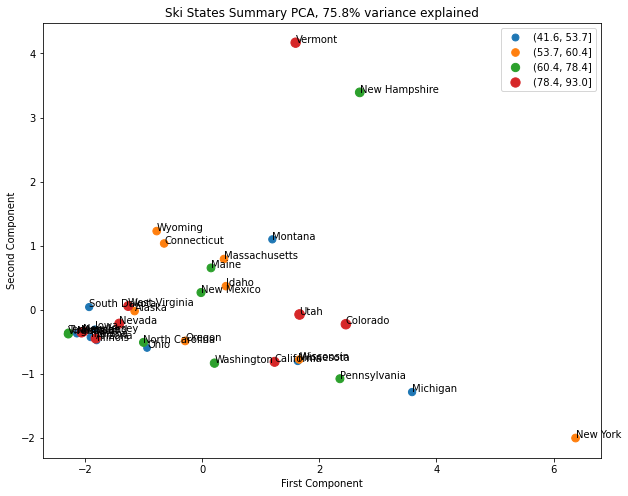

In [541]:
#pca_df is a dataframe made from pca_state_x's first 2 columns - the transformed scaled state_summary data

#thus the x & y are the same as before, state_pca_x's first 2 columns, which are 'PC1' & 'PC2' respectively
x = pca_df.PC1
y = pca_df.PC2

#naming columns / storing columns as lists
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile

state = pca_df.index

#to be used in the label beneath
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]

#size
fig, ax = plt.subplots(figsize=(10,8))


for q in quartiles.cat.categories:   #so for every quartile label/interval, q, in the list of quartile labels/intervals, 'quartiles'
    im = quartiles == q                                #what the heck is 'im'? how can it be equal to the quartiles list as a whole and each current element in it?
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q) #make a scatter plot w/ the x-value equal to the 'x' (PC1), starting w/
ax.set_xlabel('First Component')                       #the first, then the y-value (PC2) being the 'y' (PC2), starting with
ax.set_ylabel('Second Component')                      #the first, then the size is based on the respective price, (this is
plt.legend()                                           #basically like we're going thru this table one row at a time and ploting
                                                       #elements based on different items/columns in that row
                                                       #then the color will be based on the given quartile of that row/record
                             ########################### WHY DOES IT USE 'label' for color, instead of 'c'? that's the default listed; 'label' is not listed
                                                       #but also, why isn't it label=q[im]???
                                                       #the label is the color and the legend... there's only 4 q's thus
                                                       #only 4 labels/colors
                        
#so what's happening here is it's iterating through each QUARTILE in the SET of Quartiles (NOT the actual column)
#so it's starting w/ the first q in the set of quartiles, (41.6, 53.7],

#ohhh. ok, i think i get it now - not intuitive by looking, but im is a TRUE/FALSE checker to see whether the CURRENT q
#(out of the set of 4 quartiles) matches the current quartile in the column quartiles!

#so like when we start w/ the first q: (41.6, 53.7], we check where scan down the list of the quartiles column and see where
#there's a quartile == q
#SO THAT'S WHAT IM IS!!! IM IS THE ELEMENT NUMBER WHERE WE GET A MATCH W/ OUR QUARTILE IN QUESTION/OF INTEREST!! THIS IS LIKE
#A VLOOKUP! that way we can re-use that element number and pull all the other row data from there that we need to plot!!!:
#the x, the y & the price. so we want the 'im' element number of each of those
#then what about 'label', i.e. color - why doesn't that use im?
#so the color is based on the quartile
#now remember, the quartile, q, is what we STARTED WITH to find all these other ones, that's our 'vlookup' criteria
#so it wouldn't make sense to say/get the quartile value where the quartile value is equal to (41.6, 53.7] --> that's redundant!
#just say / set the color EQUAL TO the quartile value we're using to look up, WHICH IS Q!!!

#i thought maybe in theory you could do label=quartiles[im], and it does plot right, but then the problem is
#IT CREATES A LEGEND LABEL FOR EACH INSTANCE, so it'll group all the quartiles together, repeating it each time
#even w/in the same category, and give all their other info along with it
#by keeping it simple and just setting label to q, THERE **ARE** ONY 4 Q'S!!
#also, i tried using c like c=quartiles[im] but that doesn't work cuz it LITERALLY wants a color! like 'blue'
#it's not like 'hue' in seabass! where you can have discrete categories or whatever and it colors based off it

#then, when it finishes finding all those matches for that given quartile, it'll go on to the next quartile, and / until it
#does / completes this for all 4 quartiles

#we can prob achieve a different/another way too, no? like by saying, hey give me the value of the 'PC1' column in the row
#where Quartile==q -> aka the q element of the set of quartiles (quartiles.cat.categories)


ax.set_title(f'Ski States Summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))
    

In [542]:
#interesting, so there's no real pattern! at least not from this view! or at least not an obvious one!

In [543]:
#this is what showed me / made me understand what 'im' is doing!
im

state
Alaska            False
Arizona            True
California         True
Colorado           True
Connecticut       False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Maine             False
Maryland           True
Massachusetts     False
Michigan          False
Minnesota         False
Missouri          False
Montana           False
Nevada             True
New Hampshire     False
New Jersey         True
New Mexico        False
New York          False
North Carolina    False
Ohio              False
Oregon            False
Pennsylvania      False
South Dakota      False
Tennessee         False
Utah               True
Vermont            True
Virginia          False
Washington        False
West Virginia      True
Wisconsin         False
Wyoming           False
Name: Quartile, dtype: bool

Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not seeing a pattern with price.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish between weekend and weekday ticket prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

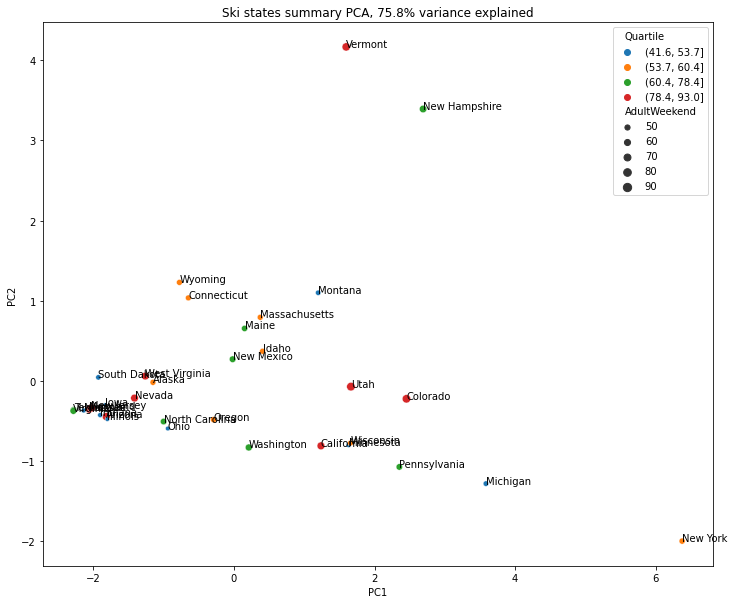

In [544]:
#Code task 11#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, size=price, hue=quartiles, hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#THERE'S THAT HUE I WAS TALKING ABOUT!!

#was the same with or without hue order?

#note, we also could've just used the 'column_names' instead of the variables that represent them

#WOW!!! THIS IS SO MUCH EASIER!!!

#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

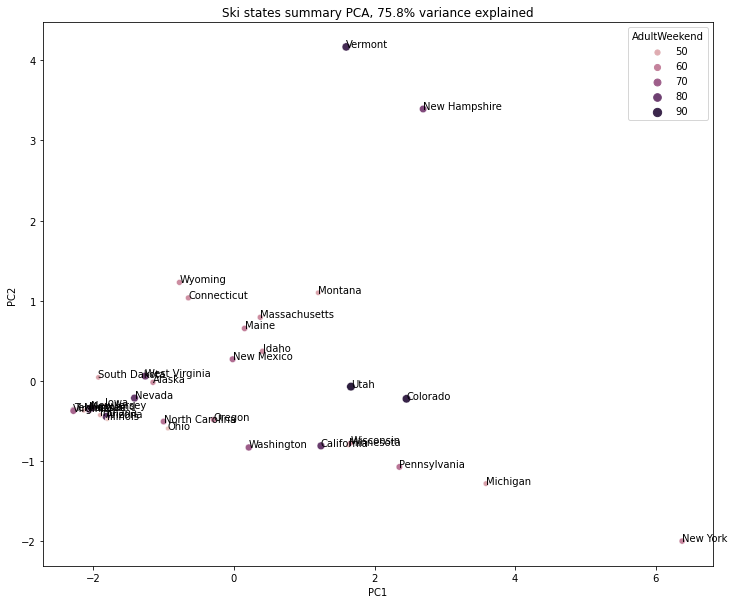

In [545]:
#nice - note how it breaks up the quartile (color) and price (size) here, whereas before it combined, which might actually
#be better. maybe you don't really need quartile - can just go by price, below
#also note how it nicely bucketizes the prices for you!

x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))

sns.scatterplot(x=x, y=y, size=price, hue=price, data=pca_df)


for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In [546]:
#need better color scheme lol, too dull

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the state summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if you were curious, could you get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [547]:
#okay so remember, state_pca was simply the PCA function, setting it/training it w/ state_summary_scale:
# state_pca = PCA().fit(state_summary_scale)

#state_pca has various attributes, like transform which we used before. and another is .components_ :

state_pca.components_

array([[ 0.49291465,  0.47811256,  0.48607811,  0.22636057,  0.39705673,
         0.17277016,  0.23114695],
       [-0.1129959 , -0.03324713, -0.10713712,  0.04014185, -0.35637019,
         0.72513081,  0.56588199],
       [-0.06509638,  0.14298456, -0.09777159,  0.81734938, -0.24680583,
         0.17095823, -0.45558617],
       [-0.05506347,  0.15006174,  0.02009644,  0.31348922, -0.36847071,
        -0.64306433,  0.57137354],
       [-0.06380006, -0.47744987, -0.31559216,  0.40610195,  0.64263387,
        -0.01936253,  0.30016792],
       [-0.10017052,  0.67234975, -0.69052745, -0.12314049,  0.211111  ,
        -0.00469825,  0.0364693 ],
       [ 0.85023113, -0.21754847, -0.4072591 , -0.02704912, -0.24721715,
        -0.03435616, -0.02985623]])

In [548]:
#the components_ attribute of the (out)fitted pca object tells us how important each of the 7 features is,
#and in which direction, as far as how much each feature contributes to each score --
#a score is a coordinate on the plot... so the PC1 & PC2??
state_pca.components_.size

49

In [549]:
#interesting - note its a ***7x7*** (nd)array. 7 lists, 7 elements each
#and there's 7 FEATURES/COLUMNS!
#so what this is saying/doing, is, it's taking each of the 7 columns, and comparing/con-pairing it with each of the others?

#shouldn't it just be one ratio/coefficient for each feature? to show how much 'weight' it has in predicting a point's plot?

#so it's saying the score is the plot... but what plot is it referring to here?
#like the above plot is based on state_pca_x, i.e. the TRANSFORMED version of state_pca
#and that plot is of PC1 vs. PC2 - but those themselves are part of the features
#so how can they have weights/directions attached to them if they're also the 'score'?
#isn't it supposed to be like there's a string of components (the features) that make up the single y-value, and so each of
#those X components has a weight attached to it, but the y-column is simply dependent on / the result of that?
#so is PC2 the thing we're tryna predict? price isn't even one of the 7 factors, so that data's not fed into it at all
#it could be that PC2 is our y, but then why would it have a weight attached to it? and we're tryna predict price, which isn't
#even any one of the 7 features in state_pca.....

In [550]:
#okay, so earlier i too thought of something similar to the below - where we'd do the same thing we did w/for
#state_summary_scaled_df -> turn the nanga array / and hook it stretch it / fasten it / clothe it onto a structured df /
#convert it into
#so i did that w/ state_pca_x to make state_pca_x_df
#so remem, state_pca by itself isn't any one number or array or df. it's an OBJECT that contains many attributes/components
#that you can call. state_pca just represents the FITTED PCA function
#state_pca_x though IS a specific set of values formed off the .transform attribute of the PCA function
state_pca_x_df.head()

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-1.153,-0.018,0.061,-0.878,0.435,0.265,-0.203
1,-1.816,-0.445,-0.036,0.120,-0.115,-0.096,-0.079
2,1.237,-0.810,0.990,0.812,-1.017,0.110,-0.037
3,2.453,-0.223,2.772,1.346,-0.749,-0.227,-0.156
4,-0.649,1.036,-1.428,1.215,0.581,-0.003,0.002


In [551]:
#so it's got a value for each of the 34 x 7 cells / cellements (cuz i didn't use Rhode Island at the time)

In [552]:
#similarly, we'll do this for state_pca.components_ --> make a df!
#state_pca.components_ is a 7x7 ndarray
#we'll fill / pour its contents into a waffle df, and we'll name it the column names we stored from state_summary/_scale (same thing, one formed from other)


In [553]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.493,0.478,0.486,0.226,0.397,0.173,0.231
1,-0.113,-0.033,-0.107,0.040,-0.356,0.725,0.566
2,-0.065,0.143,-0.098,0.817,-0.247,0.171,-0.456
3,-0.055,0.150,0.020,0.313,-0.368,-0.643,0.571
4,-0.064,-0.477,-0.316,0.406,0.643,-0.019,0.300
5,-0.100,0.672,-0.691,-0.123,0.211,-0.005,0.036
6,0.850,-0.218,-0.407,-0.027,-0.247,-0.034,-0.030


In [554]:
state_pca_wri.components_

array([[ 0.4879797 ,  0.49291798,  0.49112249,  0.30698934,  0.33332766,
         0.18474496,  0.19551444],
       [-0.0834777 , -0.04854284, -0.04378041, -0.15392068, -0.34199957,
         0.66501573,  0.63706918],
       [-0.17719017,  0.12776957,  0.01672904,  0.72651359, -0.53876174,
         0.18290287, -0.31695275],
       [ 0.06665311, -0.09289591, -0.11129468, -0.16393649,  0.32087392,
         0.69616531, -0.60004985],
       [-0.19971073, -0.24780191, -0.42276586,  0.54732322,  0.56776869,
         0.05184   ,  0.30881627],
       [-0.81107704,  0.1835527 ,  0.49347601, -0.08007194,  0.23661941,
         0.05033017, -0.00323895],
       [-0.14607516,  0.79663252, -0.56742054, -0.14626884,  0.01883232,
        -0.01741462, -0.00448502]])

In [555]:
#remem this is NOT HEAD! (not directly above but before that) this is the WHOLE THING! it's 7 rows and 7 columns...
#so how do we read this???

#so, based on below, each ROW is a component, and so you read it across, and see if there are any large values (in
#magnitude, so + or -)
#that tells you that those COLUMNS are influential for THAT FEATURE

#okay, so now we SHOW what these mysterious cryptic numbers are referring to...
#but so for state_pca_x, which is what we used to plot, that was based on the same dataset, so, as i postulated,
#that would also follow the same order of columns
#therefore, doesn't that mean that the first two columns, which we used for/as our x & y plot(s), refers to RESORTS
#PER STATE AND TOTAL SKIABLE AREA!!??

For the row associated with the second component, are there any large values?

In [556]:
#why the second?
#so we look at the second row (Index 1), that's the 'second component', and we see that our 2 derived features have the biggest
#values, both positive too. night skiing acres is also fairly strong, but in the negative direction

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [557]:
#okay so now they're talking about / distinguishing between COEFFICIENTS and features....
#so we know features are the columns
#the rows just above they called those components...
#so/and then what's the PCA score?
#and how would you multiply a feature by a coefficient?
#oh, well, i guess:
#you have your ACTUAL values and your MODEL/PREDICTIONS
#you use a training set to train / create / come up with the model
#then you test it on real data to see how well you/it did
#but so the way the model works is it assigns 'weights' to each feature to see how important each of those things are,
#according to the 'fit' / training
#so how we'd do it, is - if you took your training (or test) data set, and multiplied the ACTUALS by these coefficients,
#you'd arrive at your prediction
#but wait, that doesn't work - you have to KNOW WHAT IT IS YOU'RE PREDICTING! it'd have to be one of those features you
#fitted, but you gotta specify in order to get the coefficients, no? unless the table is like a matrix for what numbers to use
#to predict ANY one of the seven from the rest of the 6, but then that component itself you're trying to predict would have
#to be blank!
#but yeah, say you had it set up right, and you stuck you're training data in, you should get an EXACTLY RIGHT prediction!
#cuz that's the data you used to train
#so i could see you multiplying each of the ACTUAL values by their coefficients, but is the TOTAL SUM of the products the
#PCA score? or is EACH product a PCA score? i think it's the sum of the products, cuz it said before these coefficients tell
#you how much weight they hold in (predicting)/the score?
#so the FEATURE is the ACTUAL value?!

In [558]:
state_summary

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,345.0,4.0,2280.0,580.0,0.410,0.451
1,Arizona,2,237.0,6.0,1577.0,80.0,0.027,1.755
2,California,12,1651.0,31.0,9680.0,237.0,0.030,7.331
3,Colorado,14,2003.0,40.0,22232.0,110.0,0.243,13.449
4,Connecticut,5,353.0,10.0,358.0,256.0,0.140,90.204
5,Idaho,9,849.0,17.0,13102.0,315.0,0.504,10.770
6,Illinois,3,143.0,5.0,182.0,182.0,0.024,5.180
7,Indiana,2,157.0,4.0,165.0,165.0,0.030,5.491
8,Iowa,3,100.0,5.0,140.0,140.0,0.095,5.331
9,Maine,8,865.0,17.0,3204.0,388.0,0.595,22.612


In [559]:
#okay so this gives us our state_summary, formed from pretty much all data

# state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T   #originally written like this, but can't cuz changed state_summary to use state as index and don't wanna change it :D
# could reset the index but i'll leave it alone


# i thought the default state_summary DID make us change/set the state to index?
# OH, no - it didn't; we made a separate one for that - 'state_summary_newind'!
# but maybe not and maybe that has something to do w/ why my values were different? if they were different


state_summary_wri.loc[['New Hampshire', 'Vermont']].T



state,New Hampshire,Vermont
Total_Resorts,16.000,15.000
Total_Days_Open,1847.000,1777.000
Total_Terrain_Parks,43.000,50.000
Total_Skiable_Acres,3427.000,7239.000
Total_Night_Skiing_Acres,376.000,50.000
resorts_per_100kcapita,1.177,2.404
resorts_per_100ksq_mile,171.141,155.990


In [564]:
#okay so for this one can keep like this format / method cuz in mine too didn't index to state, left hanging
#just need to use my "with Rhode Island" version because that'll change the numbers slightly

#oops, just realized i never made the RI version:

state_summary_scaled_wri_df = pd.DataFrame(state_summary_scale_wri, columns=state_summary_columns)
state_summary_scaled_wri_df

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.807,-0.689,-0.816,-0.354,0.069,0.140,-0.690
1,-0.934,-0.819,-0.727,-0.408,-0.701,-0.645,-0.658
2,1.473,2.191,2.615,1.458,0.080,-0.592,-0.387
3,1.599,2.817,2.303,4.730,-0.165,0.082,-0.184
4,-0.554,-0.679,-0.549,-0.502,-0.430,-0.414,1.504
5,0.333,0.263,0.209,0.726,-0.185,0.675,-0.350
6,-0.680,-0.838,-0.727,-0.514,-0.530,-0.636,-0.532
7,-0.934,-0.915,-0.816,-0.516,-0.570,-0.640,-0.567
8,-0.807,-0.984,-0.772,-0.518,-0.609,-0.506,-0.571
9,-0.047,-0.063,-0.237,-0.283,-0.227,0.671,-0.079


In [574]:
state_summary_scaled_wri_df.set_index(state_summary_wri_index, inplace=True)
state_summary_scaled_wri_df

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,-0.807,-0.689,-0.816,-0.354,0.069,0.140,-0.690
Arizona,-0.934,-0.819,-0.727,-0.408,-0.701,-0.645,-0.658
California,1.473,2.191,2.615,1.458,0.080,-0.592,-0.387
Colorado,1.599,2.817,2.303,4.730,-0.165,0.082,-0.184
Connecticut,-0.554,-0.679,-0.549,-0.502,-0.430,-0.414,1.504
Idaho,0.333,0.263,0.209,0.726,-0.185,0.675,-0.350
Illinois,-0.680,-0.838,-0.727,-0.514,-0.530,-0.636,-0.532
Indiana,-0.934,-0.915,-0.816,-0.516,-0.570,-0.640,-0.567
Iowa,-0.807,-0.984,-0.772,-0.518,-0.609,-0.506,-0.571


In [578]:
state_summary_scaled_wri_df.loc[['New Hampshire', 'Vermont']].T

state,New Hampshire,Vermont
Total_Resorts,0.839,0.713
Total_Days_Open,1.119,1.034
Total_Terrain_Parks,0.922,1.234
Total_Skiable_Acres,-0.267,0.025
Total_Night_Skiing_Acres,-0.245,-0.748
resorts_per_100kcapita,1.711,4.227
resorts_per_100ksq_mile,3.483,3.113


In [584]:
stat_summ_merged = (state_summary_scaled_wri_df.loc[['New Hampshire', 'Vermont']].T).merge((state_summary_wri.loc[['New Hampshire', 'Vermont']].T), left_index=True, right_index=True)

In [585]:
stat_summ_merged

state,New Hampshire_x,Vermont_x,New Hampshire_y,Vermont_y
Total_Resorts,0.839,0.713,16.000,15.000
Total_Days_Open,1.119,1.034,1847.000,1777.000
Total_Terrain_Parks,0.922,1.234,43.000,50.000
Total_Skiable_Acres,-0.267,0.025,3427.000,7239.000
Total_Night_Skiing_Acres,-0.245,-0.748,376.000,50.000
resorts_per_100kcapita,1.711,4.227,1.177,2.404
resorts_per_100ksq_mile,3.483,3.113,171.141,155.990


In [ ]:
state_summary_columns

So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a big question!

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

After what may feel a detour, return to examining the ski resort data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in your modeling.

In [ ]:
ski_data.head().T

#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the state summary data you derived, you now start to explore the resort-level data in more detail. This can help guide you on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a resort's share of the supply for a given state.

In [ ]:
state_summary.head()

In [ ]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

Having merged your state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once you've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [ ]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

In [ ]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.___(ski_data.___);

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. You can also see that you've introduced a lot of multicollinearity with your new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If you increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning your attention to your target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [ ]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [___ for ___ in ski_data.columns if ___ not in [___, ___, ___, ___]]

In [ ]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. You have the numbers of various chairs, and the number of runs, but you don't have the ratio of chairs to runs. It seems logical that this ratio would inform you how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [ ]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

In [ ]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** Your answer here

In [ ]:
ski_data.head().T

In [ ]:
# Save the data 

datapath = '../data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)